# PROJETO DE INICIAÇÃO CIENTIFICA

### Índice:
- #### 0. Preparando o ambiente
- #### 1. Carregando os Dados
- #### 2. Análise, tratamento e limpeza dos dados
- #### 3. Gerando o Perfil/Descrição dos Dados
- #### 4. Juntando as tabelas Alertas e Locais
- #### 5. Separando o Dataset em 3 Dataframes de acordo com o estado 
- #### 6. Fazendo o treinamento do modelo centralizado com os datasets de diferentes estados

## 0. Preparando o ambiente

In [1]:
# Atualizando o pip
%pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
  Rolling back uninstall of pip
  Moving to c:\users\guisp\appdata\roaming\python\python311\scripts\pip.exe
   from C:\Users\guisp\AppData\Local\Temp\pip-uninstall-0_qn4sw5\pip.exe
  Moving to c:\users\guisp\appdata\roaming\python\python311\scripts\pip3.11.exe
   from C:\Users\guisp\AppData\Local\Temp\pip-uninstall-0_qn4sw5\pip3.11.exe
  Moving to c:\users\guisp\appdata\roaming\python\python311\scripts\pip3.exe
   from C:\Users\guisp\AppData\Local\Temp\pip-uninstall-0_qn4sw5\pip3.exe
  Moving to c:\users\guisp\appdata\roaming\python\python311\site-packages\pip-24.0.dist-info\
   from C:\Users\guisp\AppData\Roaming\Python\Python311\site-packages\~ip-24.0.dist-info
  Moving to c:\users\guisp\appdata\roaming\python\python311\site-packages\pip\
   fr

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\Python311\\Lib\\site-packages\\pip\\__init__.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 0.1. Instalando e atualizando bibliotecas

In [2]:
%pip install seaborn
#%pip install tensorflow
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install psutil



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 0.2. Importando bibliotecas

In [3]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential  # tipo de modelo
#from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation, DepthwiseConv1D, GlobalMaxPooling1D  # camadas utilizadas nos modelos
import pandas as pd  # para gerar os DataFrames (tabelas)
import numpy as np  # séries de dados
import matplotlib.pyplot as plt  # para visualização dos dados em gráficos


## 1. Carregando os Dados

### 1.1. Tabela Alertas

In [4]:
import pandas as pd

# Ler o arquivo XLSX em um DataFrame
df_alertas = pd.read_csv('./dataset/alertas.csv',sep=';')

# Exibir o DataFrame alertas
display(df_alertas.shape)
display(df_alertas)

(83032, 13)

,AleID,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,AleNat,AleDatIns
0,82,92713164,2021-10-23 17:35:59.000,11842,2,BIN ROUBO/FURTO,2021,2021-10-08 21:00:00.000,UNIAO,93788,PI,FURTADO,2021-10-23 17:36:07.340
1,142,52734670,2021-10-23 17:40:27.000,12167,1,BIN ROUBO/FURTO,2021,2021-09-23 21:00:00.000,BRASILIA,5537,DF,ROUBADO,2021-10-23 17:40:36.393
2,285,42546793,2021-10-23 17:53:01.000,12180,2,BIN ROUBO/FURTO,2021,2021-10-16 21:00:00.000,POSSE,24200,GO,FURTADO,2021-10-23 17:53:10.590
3,368,101351871,2021-10-23 17:58:41.000,11894,2,BIN ROUBO/FURTO,2021,2021-10-17 21:00:00.000,BRASILIA,7130,DF,FURTADO,2021-10-23 17:58:49.940
4,369,51904296,2021-10-23 17:58:47.000,11924,2,BIN ROUBO/FURTO,2021,2021-10-12 21:00:00.000,BRASILIA,2681,DF,FURTADO,2021-10-23 17:58:57.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83027,11459021,88123096,2023-09-22 14:58:00.000,47449,1,BIN ROUBO/FURTO,2023,2023-09-22 14:56:00.000,NaN,NaN,,ROUBADO,2023-09-22 14:58:09.620
83028,11459022,88123096,2023-09-22 14:58:00.000,47449,1,BIN ROUBO/FURTO,2023,2023-09-22 14:56:00.000,NaN,NaN,,ROUBADO,2023-09-22 14:58:09.620
83029,11459203,42773243,2023-09-22 15:11:04.000,52523,1,BIN ROUBO/FURTO,2023,2023-08-27 18:16:00.000,NaN,NaN,,ROUBADO,2023-09-22 15:11:11.193
83030,11459212,42773243,2023-09-22 15:11:58.000,52540,1,BIN ROUBO/FURTO,2023,2023-08-27 18:16:00.000,NaN,NaN,,ROUBADO,2023-09-22 15:12:06.147


### 1.2. Tabela Locais

In [5]:
# Ler o arquivo XLSX em um DataFrame
df_locais = pd.read_csv('./dataset/locais.csv', sep=';', encoding='iso-8859-1')

# Exibir o DataFrame locais
display(df_locais.shape)
display(df_locais)

(42053, 10)

,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
0,0,RADAR MOVEL,0xE6100000010C00000000000000000000000000000000,0,0,0,0,0,NaN,
1,762,RJ - NITEROI - RUA DR MARIO VIANNA - ENTRANDO ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,"-22,905474","-43,089393",606,NITEROI,RJ
2,763,RJ - NITEROI - RUA DR MARIO VIANNA - SAINDO - ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,"-22,905474","-43,089393",606,NITEROI,RJ
3,764,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,"-22,883792","-43,109715",606,NITEROI,RJ
4,765,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,"-22,883792","-43,109715",606,NITEROI,RJ
...,...,...,...,...,...,...,...,...,...,...
42048,58075,PR - CAMPINA GRANDE DO SUL - JULIO LUVIZOTO X ...,0xE6100000010C0D71AC8BDB5839C04BEA0434118E48C0,1,4,"-25,3471","-49,1099",1989,CAMPINA GRANDE DO SUL,PR
42049,58076,PR - QUATRO BARRAS - PEDRO PASA X JOSE SBALCHI...,0xE6100000010CCBA145B6F35D39C0A1D634EF388D48C0,1,4,"-25,367","-49,1033",1425,QUATRO BARRAS,PR
42050,58077,PR - CAMPINA GRANDE DO SUL - ANIBALI FERRARINI...,0xE6100000010C091B9E5E295B39C055302AA9139048C0,1,4,"-25,3561","-49,1256",1989,CAMPINA GRANDE DO SUL,PR
42051,58078,PR - CAMPINA GRANDE DO SUL - ESTRADA GENGIRO A...,0xE6100000010CB7627FD93D5939C06688635DDC8648C0,1,4,"-25,3486","-49,0536",1989,CAMPINA GRANDE DO SUL,PR


## 2. Análise, tratamento e limpeza dos dados
### Processo iterativo que é refinado a cada fase

### 2.1. Tabela Alertas

#### Limpeza / Deduplicação

In [6]:
# Deduplicar dados da tabela Alertas:
# a coluna 'AleDatIns' gera a data de inserção do registro no BD, então, ao inserir um registro de forma duplicada,
# apesar de ser duplicado esse valor, assim como o valor da Chave Primária 'AleID' permanecem únicos. 
# Para conseguir Deduplicar essas inserções, vamos remover da tabela essas 2 colunas 'AleDatIns' e 'AleID'.
registros_totais = len(df_alertas)
df_alertas = df_alertas[['EmpID','DataHora','LocID','AleAleTipID','AleSisOcr',
                        'AleAnoBO','AleDatOcr','AleMunBO','AleNumBO','AleUfBo',
                        'AleNat']].drop_duplicates()
print("\n*Dos " + str(registros_totais) + " registros totais iniciais, após a deduplicação, ficaram apenas " + str(len(df_alertas)) + " registros únicos.\n")
#display(df_alertas)


*Dos 83032 registros totais iniciais, após a deduplicação, ficaram apenas 49844 registros únicos.



In [7]:
# Dados de UF de BO nulos
display(df_alertas[df_alertas['AleUfBo'].isnull()])
# Ainda não é necessário deletar.

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,AleNat
12838,47578468,2022-02-05 03:07:03.000,11868,10,NaN,2022,2022-01-27 00:00:00.000,NaN,200,NaN,NaN
12839,47578468,2022-02-05 03:07:33.000,11862,10,NaN,2022,2022-01-27 00:00:00.000,NaN,200,NaN,NaN
12840,81767604,2022-02-05 03:07:57.000,11972,10,NaN,2022,2022-02-02 00:00:00.000,NaN,4322,NaN,NaN
12841,81767604,2022-02-05 03:10:42.000,12061,10,NaN,2022,2022-02-02 00:00:00.000,NaN,4322,NaN,NaN


#### Enriquecimento dos Dados / Engenharia de Recursos

In [8]:
# Preencher os dados vazios de AleNat
df_alertas.loc[df_alertas['AleAleTipID'] == 10, 'AleNat'] = 'LOCALIZADO'

In [9]:
# Criar um novo campo com os dados da diferença de tempo entre a criação do BO e o momento do Alerta que o veículo passa pela câmera (sensor externo)
df_alertas['DataHora'] = pd.to_datetime(df_alertas['DataHora'])
df_alertas['AleDatOcr'] = pd.to_datetime(df_alertas['AleDatOcr'])    
df_alertas['TempoDoBO'] = df_alertas['DataHora'] - df_alertas['AleDatOcr']

display(df_alertas.sort_values(by=['EmpID', 'DataHora']))

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,AleNat,TempoDoBO
3856,18686,2021-11-22 16:38:12,35800,2,BIN ROUBO/FURTO,2021,2021-11-22 00:00:00,BRASILIA,12396,DF,FURTADO,0 days 16:38:12
19689,35197,2022-04-10 16:12:06,12219,1,BIN ROUBO/FURTO,2022,2022-03-30 00:00:00,TELEMACO BORBA,2001734,PR,ROUBADO,11 days 16:12:06
70137,87382,2022-11-12 13:38:38,12137,1,BIN ROUBO/FURTO,2022,2022-10-26 00:00:00,SAO PAULO,2309904,SP,ROUBADO,17 days 13:38:38
52013,91202,2022-05-03 23:30:13,12018,2,BIN ROUBO/FURTO,2022,2022-04-25 00:00:00,BRASILIA,3628,DF,FURTADO,8 days 23:30:13
6938,93883,2021-12-16 13:14:33,35798,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,ROUBADO,13 days 13:14:33
...,...,...,...,...,...,...,...,...,...,...,...,...
80896,119983208,2023-09-10 00:39:35,35541,1,BIN ROUBO/FURTO,2023,2023-08-29 18:16:00,NaN,NaN,,ROUBADO,11 days 06:23:35
81568,120003346,2023-09-13 12:14:40,47391,1,BIN ROUBO/FURTO,2023,2023-09-06 15:02:00,NaN,NaN,,ROUBADO,6 days 21:12:40
82447,120033193,2023-09-18 22:37:41,48127,1,BIN ROUBO/FURTO,2023,2023-09-12 07:23:00,NaN,NaN,,ROUBADO,6 days 15:14:41
81243,120268410,2023-09-11 19:34:41,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00,NaN,NaN,,ROUBADO,1 days 07:00:41


#### Verificação de valores Nulos e Brancos

In [10]:
# Verificar a quantidade de valores nulos no campo 'DataHora'
quantidade_nulos = df_alertas['DataHora'].isnull().sum()
print(f'Quantidade de valores nulos no campo DataHora: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'DataHora'
quantidade_em_branco = (df_alertas['DataHora'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo DataHora: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'LocID'
quantidade_nulos = df_alertas['LocID'].isnull().sum()
print(f'Quantidade de valores nulos no campo LocID: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'LocID'
quantidade_em_branco = (df_alertas['LocID'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo LocID: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleAleTipID'
quantidade_nulos = df_alertas['AleAleTipID'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleAleTipID: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleAleTipID'
quantidade_em_branco = (df_alertas['AleAleTipID'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleAleTipID: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleSisOcr'
quantidade_nulos = df_alertas['AleSisOcr'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleSisOcr: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleSisOcr'
quantidade_em_branco = (df_alertas['AleSisOcr'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleSisOcr: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleDatOcr'
quantidade_nulos = df_alertas['AleDatOcr'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleDatOcr: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleDatOcr'
quantidade_em_branco = (df_alertas['AleDatOcr'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleDatOcr: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleMunBO'
quantidade_nulos = df_alertas['AleMunBO'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleMunBO: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleMunBO'
quantidade_em_branco = (df_alertas['AleMunBO'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleMunBO: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleUfBo'
quantidade_nulos = df_alertas['AleUfBo'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleUfBo: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleUfBo'
quantidade_em_branco = (df_alertas['AleUfBo'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleUfBo: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleNat'
quantidade_nulos = df_alertas['AleNat'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleNat: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleNat'
quantidade_em_branco = (df_alertas['AleNat'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleNat: {quantidade_em_branco}')

Quantidade de valores nulos no campo DataHora: 0
Quantidade de valores em branco no campo DataHora: 0
Quantidade de valores nulos no campo LocID: 0
Quantidade de valores em branco no campo LocID: 0
Quantidade de valores nulos no campo AleAleTipID: 0
Quantidade de valores em branco no campo AleAleTipID: 0
Quantidade de valores nulos no campo AleSisOcr: 57
Quantidade de valores em branco no campo AleSisOcr: 0
Quantidade de valores nulos no campo AleDatOcr: 0
Quantidade de valores em branco no campo AleDatOcr: 0
Quantidade de valores nulos no campo AleMunBO: 3409
Quantidade de valores em branco no campo AleMunBO: 0
Quantidade de valores nulos no campo AleUfBo: 4
Quantidade de valores em branco no campo AleUfBo: 2961
Quantidade de valores nulos no campo AleNat: 0
Quantidade de valores em branco no campo AleNat: 0


### 2.2. Tabela Locais

#### Limpeza / Deduplicação

In [11]:
# Remover locais que não possuem localização geográfica.
registros_totais = len(df_locais)
df_locais = df_locais.drop_duplicates()
print("\n*Dos " + str(registros_totais) + " registros totais iniciais, após a deduplicação, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")

df_locais = df_locais[df_locais['LocLat'] != 0]
print("**Dos registros deduplicados, após a seleção apenas dos Locais com LocLat != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.")
df_locais = df_locais[df_locais['LocLong'] != 0]
print("**Dos registros com LocLat != 0, após a seleção apenas dos Locais com LocLong != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")
df_locais = df_locais[df_locais['LocAtv'] != 0]
print("***Dos registros com LocLong != 0, após a seleção apenas dos Locais com LocAtv != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")
# LocAtv == 0 está duplicado com LocAtv == 1 para as informações relevantes.

#display(df_locais)


*Dos 42053 registros totais iniciais, após a deduplicação, ficaram apenas 42053 registros únicos.

**Dos registros deduplicados, após a seleção apenas dos Locais com LocLat != 0, ficaram apenas 42053 registros únicos.
**Dos registros com LocLat != 0, após a seleção apenas dos Locais com LocLong != 0, ficaram apenas 42053 registros únicos.

***Dos registros com LocLong != 0, após a seleção apenas dos Locais com LocAtv != 0, ficaram apenas 35204 registros únicos.



In [12]:
# Retirar localizações fora do Brasil, se houver.

# Suponha que você tenha um DataFrame chamado df com colunas 'latitude' e 'longitude'

# Limites aproximados do Brasil (latitude, longitude)
lat_min, lat_max = -33.75, 5.25
lon_min, lon_max = -74.00, -34.75


# Filtrar os dados para manter apenas aqueles dentro dos limites do Brasil
'''
# Converter colunas para float, substituindo vírgulas por pontos

df_fora_brasil = df_locais[(df_locais['LocLat'] <= lat_min) | (df_locais['LocLat'] >= lat_max) |
               (df_locais['LocLong'] <= lon_min) | (df_locais['LocLong'] >= lon_max)]

'''
df_locais['LocLat'] = df_locais['LocLat'].str.replace(',', '.').astype(float)
df_locais['LocLong'] = df_locais['LocLong'].str.replace(',', '.').astype(float)
df_fora_brasil = df_locais[(df_locais['LocLat'] <= lat_min) | (df_locais['LocLat'] >= lat_max) |
                           (df_locais['LocLong'] <= lon_min) | (df_locais['LocLong'] >= lon_max)]
# Se desejar remover os pontos fora do Brasil em vez de criar um novo DataFrame:
# df = df[(df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) &
#         (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)]

# Visualizar o DataFrame resultante
print(df_fora_brasil)


Empty DataFrame
Columns: [LocID, LocNomLocMJSP, LocGeog, LocAtv, EmpID, LocLat, LocLong, LocMunGeoID, MunGeoNum, UFGeoSgl]
Index: []


In [13]:
# LocID diferentes para o mesmo (LocLat, LocLong), porém não há o que fazer, pois os LocID diferentes são usados na tabela Alertas.
display(df_locais[df_locais['LocLat'] == -15.7404])
# Ainda não é necessário deletar.
# os diferentes LocID para o mesmo LocLat e LocLong é por haver mais de uma câmera (sensor externo) na mesmo posição geográfica, 
# registrando raias diferentes da mesa estrada.

,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
20505,35735,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO
20510,35740,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO
20519,35749,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO
20531,35761,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO
20543,35773,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO


#### Enriquecimento dos Dados / Engenharia de Recursos

In [14]:
# Definir o número desejado de casas decimais
num_decimals = 8

# Formatar os valores resultantes
df_locais = np.round(df_locais, num_decimals)

display(df_locais)

,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
1,762,RJ - NITEROI - RUA DR MARIO VIANNA - ENTRANDO ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,-22.905474,-43.089393,606,NITEROI,RJ
2,763,RJ - NITEROI - RUA DR MARIO VIANNA - SAINDO - ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,-22.905474,-43.089393,606,NITEROI,RJ
3,764,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,-22.883792,-43.109715,606,NITEROI,RJ
4,765,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,-22.883792,-43.109715,606,NITEROI,RJ
5,768,RJ - NITEROI - TUNEL RAUL VEIGA - ENTRANDO -SE...,0xE6100000010C3A9677D503EA36C0859675FF588C45C0,1,4,-22.914121,-43.096466,606,NITEROI,RJ
...,...,...,...,...,...,...,...,...,...,...
42048,58075,PR - CAMPINA GRANDE DO SUL - JULIO LUVIZOTO X ...,0xE6100000010C0D71AC8BDB5839C04BEA0434118E48C0,1,4,-25.347100,-49.109900,1989,CAMPINA GRANDE DO SUL,PR
42049,58076,PR - QUATRO BARRAS - PEDRO PASA X JOSE SBALCHI...,0xE6100000010CCBA145B6F35D39C0A1D634EF388D48C0,1,4,-25.367000,-49.103300,1425,QUATRO BARRAS,PR
42050,58077,PR - CAMPINA GRANDE DO SUL - ANIBALI FERRARINI...,0xE6100000010C091B9E5E295B39C055302AA9139048C0,1,4,-25.356100,-49.125600,1989,CAMPINA GRANDE DO SUL,PR
42051,58078,PR - CAMPINA GRANDE DO SUL - ESTRADA GENGIRO A...,0xE6100000010CB7627FD93D5939C06688635DDC8648C0,1,4,-25.348600,-49.053600,1989,CAMPINA GRANDE DO SUL,PR


In [15]:
# Aplicar a transformação logarítmica para valorizar as casas decimais menores
df_locais['LocLat'] = df_locais['LocLat']
df_locais[['LocLat','LocLong']] = df_locais[['LocLat','LocLong']]
df_locais

,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
1,762,RJ - NITEROI - RUA DR MARIO VIANNA - ENTRANDO ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,-22.905474,-43.089393,606,NITEROI,RJ
2,763,RJ - NITEROI - RUA DR MARIO VIANNA - SAINDO - ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,-22.905474,-43.089393,606,NITEROI,RJ
3,764,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,-22.883792,-43.109715,606,NITEROI,RJ
4,765,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,-22.883792,-43.109715,606,NITEROI,RJ
5,768,RJ - NITEROI - TUNEL RAUL VEIGA - ENTRANDO -SE...,0xE6100000010C3A9677D503EA36C0859675FF588C45C0,1,4,-22.914121,-43.096466,606,NITEROI,RJ
...,...,...,...,...,...,...,...,...,...,...
42048,58075,PR - CAMPINA GRANDE DO SUL - JULIO LUVIZOTO X ...,0xE6100000010C0D71AC8BDB5839C04BEA0434118E48C0,1,4,-25.347100,-49.109900,1989,CAMPINA GRANDE DO SUL,PR
42049,58076,PR - QUATRO BARRAS - PEDRO PASA X JOSE SBALCHI...,0xE6100000010CCBA145B6F35D39C0A1D634EF388D48C0,1,4,-25.367000,-49.103300,1425,QUATRO BARRAS,PR
42050,58077,PR - CAMPINA GRANDE DO SUL - ANIBALI FERRARINI...,0xE6100000010C091B9E5E295B39C055302AA9139048C0,1,4,-25.356100,-49.125600,1989,CAMPINA GRANDE DO SUL,PR
42051,58078,PR - CAMPINA GRANDE DO SUL - ESTRADA GENGIRO A...,0xE6100000010CB7627FD93D5939C06688635DDC8648C0,1,4,-25.348600,-49.053600,1989,CAMPINA GRANDE DO SUL,PR


#### Verificação de valores Nulos e Brancos

In [16]:
# Verificar a quantidade de valores nulos no campo 'LocID'
quantidade_nulos = df_locais['LocID'].isnull().sum()
print(f'Quantidade de valores nulos no campo LocID: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'LocID'
quantidade_em_branco = (df_locais['LocID'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo LocID: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'LocLat'
quantidade_nulos = df_locais['LocLat'].isnull().sum()
print(f'Quantidade de valores nulos no campo LocLat: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'LocLat'
quantidade_em_branco = (df_locais['LocLat'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo LocLat: {quantidade_em_branco}')
# Verificar a quantidade de valores nulos no campo 'LocLat'
quantidade_zeros = len(df_locais[df_locais['LocLat'] == 0])
print(f'Quantidade de valores zero no campo LocLat: {quantidade_zeros}')

# Verificar a quantidade de valores nulos no campo 'LocLong'
quantidade_nulos = df_locais['LocLong'].isnull().sum()
print(f'Quantidade de valores nulos no campo LocLong: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'LocLong'
quantidade_em_branco = (df_locais['LocLong'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo LocLong: {quantidade_em_branco}')
# Verificar a quantidade de valores nulos no campo 'LocLong'
quantidade_zeros = len(df_locais[df_locais['LocLong'] == 0])
print(f'Quantidade de valores zero no campo LocLong: {quantidade_zeros}')


Quantidade de valores nulos no campo LocID: 0
Quantidade de valores em branco no campo LocID: 0
Quantidade de valores nulos no campo LocLat: 0
Quantidade de valores em branco no campo LocLat: 0
Quantidade de valores zero no campo LocLat: 0
Quantidade de valores nulos no campo LocLong: 0
Quantidade de valores em branco no campo LocLong: 0
Quantidade de valores zero no campo LocLong: 0


## 4. Juntando as tabelas Alertas e Locais

In [17]:
# Realiza uma junção (merge) entre os dataframes df_alertas e df_locais com base na coluna 'LocID'.
# A junção é feita utilizando o método inner join, que retorna apenas as linhas com correspondências em ambas as tabelas.
df_all = df_alertas.merge(df_locais, on='LocID', how='inner')

# Renomeia as colunas do dataframe resultante da junção:
# 'EmpID_x' é renomeado para 'EmpID'
# 'EmpID_y' é renomeado para 'EmpresaID'
df_all = df_all.rename(columns={"EmpID_x": "EmpID", "EmpID_y": "EmpresaID"})

# Exibe o dataframe resultante após a junção e renomeação das colunas
display(df_all)

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
0,92713164,2021-10-23 17:35:59,11842,2,BIN ROUBO/FURTO,2021,2021-10-08 21:00:00,UNIAO,93788,PI,...,14 days 20:35:59,"DF - BRASILIA - 009 (EPPN) - KM 7,1 - SENT CLU...",0xE6100000010CC802CBB6787D2FC06D904946CEEC47C0,1,1,-15.745062,-47.850045,815,BRASILIA,DF
1,98993768,2021-10-29 15:11:31,11842,2,BIN ROUBO/FURTO,2021,2021-10-08 21:00:00,BRASILIA,5790,DF,...,20 days 18:11:31,"DF - BRASILIA - 009 (EPPN) - KM 7,1 - SENT CLU...",0xE6100000010CC802CBB6787D2FC06D904946CEEC47C0,1,1,-15.745062,-47.850045,815,BRASILIA,DF
2,104204749,2021-11-17 12:58:58,11842,2,BIN ROUBO/FURTO,2021,2021-10-29 00:00:00,BRASILIA,7749,DF,...,19 days 12:58:58,"DF - BRASILIA - 009 (EPPN) - KM 7,1 - SENT CLU...",0xE6100000010CC802CBB6787D2FC06D904946CEEC47C0,1,1,-15.745062,-47.850045,815,BRASILIA,DF
3,8647008,2021-11-24 13:02:47,11842,2,BIN ROUBO/FURTO,2021,2021-11-01 00:00:00,VERA CRUZ,1808,RS,...,23 days 13:02:47,"DF - BRASILIA - 009 (EPPN) - KM 7,1 - SENT CLU...",0xE6100000010CC802CBB6787D2FC06D904946CEEC47C0,1,1,-15.745062,-47.850045,815,BRASILIA,DF
4,8647008,2021-11-27 10:55:25,11842,2,BIN ROUBO/FURTO,2021,2021-11-01 00:00:00,VERA CRUZ,1808,RS,...,26 days 10:55:25,"DF - BRASILIA - 009 (EPPN) - KM 7,1 - SENT CLU...",0xE6100000010CC802CBB6787D2FC06D904946CEEC47C0,1,1,-15.745062,-47.850045,815,BRASILIA,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40792,100199801,2023-09-20 10:30:51,35721,1,BIN ROUBO/FURTO,2023,2023-09-12 16:44:00,NaN,NaN,,...,7 days 17:46:51,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 500 ...,0xE6100000010CEBE2361AC07B2FC0F163CC5D4B2848C0,1,56,-15.741700,-48.314800,4340,AGUA LINDAS DE GOIAS,GO
40793,114491724,2023-09-20 14:15:56,47798,1,BIN ROUBO/FURTO,2023,2023-09-15 15:47:00,NaN,NaN,,...,4 days 22:28:56,"CE - MAURITI - CE-384, KM 16 - SENTIDO: OESTE ...",0xE6100000010C9EEA909BE1861DC03F575BB1BF6443C0,1,89,-7.381720,-38.787100,4685,MAURITI,CE
40794,106277334,2023-09-20 21:00:14,52472,1,BIN ROUBO/FURTO,2023,2023-09-15 22:27:00,NaN,NaN,,...,4 days 22:33:14,"CE - HORIZONTE - BR-116/CE KM 39,950 C - HORIZ...",0xE6100000010CA9A44E40136110C0637FD93D794043C0,1,89,-4.094800,-38.503700,868,HORIZONTE,CE
40795,106277334,2023-09-21 21:11:24,52472,1,BIN ROUBO/FURTO,2023,2023-09-15 22:27:00,NaN,NaN,,...,5 days 22:44:24,"CE - HORIZONTE - BR-116/CE KM 39,950 C - HORIZ...",0xE6100000010CA9A44E40136110C0637FD93D794043C0,1,89,-4.094800,-38.503700,868,HORIZONTE,CE


#### 4.1 Colocando em ordem cronológica por veículo

In [18]:
#Organizando o DataFrame em ordem cronológica

df_all['DataHora'] = pd.to_datetime(df_all['DataHora'])
df_all = df_all.sort_values(by=['EmpID', 'DataHora'])
display(df_all)

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
28869,18686,2021-11-22 16:38:12,35800,2,BIN ROUBO/FURTO,2021,2021-11-22 00:00:00,BRASILIA,12396,DF,...,0 days 16:38:12,GO - AGUA LINDAS DE GOIAS - BR-70 KM 6 + 600 -...,0xE6100000010CE78C28ED0D7E2FC0E02D90A0F82148C0,1,56,-15.746200,-48.265400,4340,AGUA LINDAS DE GOIAS,GO
22552,35197,2022-04-10 16:12:06,12219,1,BIN ROUBO/FURTO,2022,2022-03-30 00:00:00,TELEMACO BORBA,2001734,PR,...,11 days 16:12:06,"DF - BRASILIA - 085 (EPTG) KM - 6,5 VIA PRINCI...",0xE6100000010C6830575062A12FC02C0FD253E40048C0,1,1,-15.815203,-48.006968,815,BRASILIA,DF
29416,87382,2022-11-12 13:38:38,12137,1,BIN ROUBO/FURTO,2022,2022-10-26 00:00:00,SAO PAULO,2309904,SP,...,17 days 13:38:38,"DF - BRASILIA - 085 (EPTG) KM - 1,3 SENT TAGUA...",0xE6100000010C1292BBBEC59D2FC0F5D5FAC7E7FA47C0,1,1,-15.808149,-47.960198,815,BRASILIA,DF
7792,91202,2022-05-03 23:30:13,12018,2,BIN ROUBO/FURTO,2022,2022-04-25 00:00:00,BRASILIA,3628,DF,...,8 days 23:30:13,"DF - BRASILIA - 095 (EPCL ESTRUTURAL) KM - 0,6...",0xE6100000010CFFF1B96EA5962FC091138145D9FA47C0,1,1,-15.794231,-47.959756,815,BRASILIA,DF
28923,93883,2021-12-16 13:14:33,35798,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:14:33,GO - AGUA LINDAS DE GOIAS - BR-70 KM 5 + 900 -...,0xE6100000010C54E3A59BC4802FC0A835CD3B4E2148C0,1,56,-15.751500,-48.260200,4340,AGUA LINDAS DE GOIAS,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39795,119983208,2023-09-10 00:39:35,52547,1,BIN ROUBO/FURTO,2023,2023-08-29 18:16:00,NaN,NaN,,...,11 days 06:23:35,"DF - BRASILIA - BR 070-DF KM 7,800 - BRASILIA-...",0xE6100000010C52B81E85EB912FC0736891ED7C0F48C0,1,89,-15.785000,-48.121000,815,BRASILIA,DF
39177,120003346,2023-09-13 12:14:40,47391,1,BIN ROUBO/FURTO,2023,2023-09-06 15:02:00,NaN,NaN,,...,6 days 21:12:40,CE - FORTALEZA - AV. WASHINGTON SOARES DEFRONT...,0xE6100000010C30815B77F3940EC021B07268913D43C0,1,89,-3.822730,-38.481000,4613,FORTALEZA,CE
34183,120033193,2023-09-18 22:37:41,48127,1,BIN ROUBO/FURTO,2023,2023-09-12 07:23:00,NaN,NaN,,...,6 days 15:14:41,"CE - SOBRAL - AV. CEL DIOGO GOMES, 353 - CORAC...",0xE6100000010CA27F828B15750DC06ADE718A8E2C44C0,1,89,-3.682170,-40.348100,4734,SOBRAL,CE
34032,120268410,2023-09-11 19:34:41,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00,NaN,NaN,,...,1 days 07:00:41,"CE - FORTALEZA - CE-401, KM 4 - SENTIDO: LESTE...",0xE6100000010CD235936FB6390EC0E78C28ED0D4643C0,1,89,-3.778180,-38.547300,4613,FORTALEZA,CE


In [19]:
# Converte a coluna 'UFGeoSgl' do dataframe df_all para um conjunto (set), 
# removendo duplicatas e exibindo os valores únicos presentes nesta coluna.

set(df_all['UFGeoSgl'])

{'CE', 'DF', 'GO'}

## 5. Separando o Dataset em 3 Dataframes de acordo com o estado

In [20]:
# Cria 3 novos dataframes, um para cada estado: GO, DF e CE

df_GO = df_all[df_all['UFGeoSgl'] == 'GO']
df_DF = df_all[df_all['UFGeoSgl'] == 'DF']
df_CE = df_all[df_all['UFGeoSgl'] == 'CE']


- #### Dataframe de Goias

In [21]:
display(df_GO)

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
28869,18686,2021-11-22 16:38:12,35800,2,BIN ROUBO/FURTO,2021,2021-11-22,BRASILIA,12396,DF,...,0 days 16:38:12,GO - AGUA LINDAS DE GOIAS - BR-70 KM 6 + 600 -...,0xE6100000010CE78C28ED0D7E2FC0E02D90A0F82148C0,1,56,-15.7462,-48.2654,4340,AGUA LINDAS DE GOIAS,GO
28923,93883,2021-12-16 13:14:33,35798,1,BIN ROUBO/FURTO,2021,2021-12-03,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:14:33,GO - AGUA LINDAS DE GOIAS - BR-70 KM 5 + 900 -...,0xE6100000010C54E3A59BC4802FC0A835CD3B4E2148C0,1,56,-15.7515,-48.2602,4340,AGUA LINDAS DE GOIAS,GO
30317,93883,2021-12-16 13:16:01,35809,1,BIN ROUBO/FURTO,2021,2021-12-03,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:16:01,GO - AGUA LINDAS DE GOIAS - BR-70 KM 4 + 450 -...,0xE6100000010CBE9F1A2FDD842FC01D5A643BDF1F48C0,1,56,-15.7595,-48.2490,4340,AGUA LINDAS DE GOIAS,GO
12610,93883,2021-12-16 13:16:30,35772,1,BIN ROUBO/FURTO,2021,2021-12-03,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:16:30,GO - AGUA LINDAS DE GOIAS - BR-70 KM 4 + 00 - ...,0xE6100000010C1361C3D32B852FC0ACADD85F761F48C0,1,56,-15.7601,-48.2458,4340,AGUA LINDAS DE GOIAS,GO
23910,93883,2021-12-16 13:18:50,35826,1,BIN ROUBO/FURTO,2021,2021-12-03,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:18:50,GO - AGUA LINDAS DE GOIAS - BR-70 KM 1 + 250 -...,0xE6100000010CEA95B20C718C2FC0CB10C7BAB81D48C0,1,56,-15.7743,-48.2322,4340,AGUA LINDAS DE GOIAS,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23999,118328685,2022-11-08 15:13:09,35826,2,BIN ROUBO/FURTO,2022,2022-10-29,BRASILIA,7168,DF,...,10 days 15:13:09,GO - AGUA LINDAS DE GOIAS - BR-70 KM 1 + 250 -...,0xE6100000010CEA95B20C718C2FC0CB10C7BAB81D48C0,1,56,-15.7743,-48.2322,4340,AGUA LINDAS DE GOIAS,GO
19978,118507869,2023-05-05 16:59:16,35733,1,SINESP INTEGRACAO,2023,2023-05-02,RIO DE JANEIRO,044-02303/2023,RJ,...,3 days 16:59:16,GO - AGUA LINDAS DE GOIAS - BR-70 KM 7 + 500 -...,0xE6100000010C08AC1C5A647B2FC0ED0DBE30992248C0,1,56,-15.7410,-48.2703,4340,AGUA LINDAS DE GOIAS,GO
39346,118575295,2023-07-10 16:27:00,57146,1,SINESP INTEGRACAO,2023,2023-07-06,RIO VERDE,30880684,GO,...,4 days 16:27:00,"GO - GOIANIA - GO 060 KM 000+200, SENT TRINDAD...",0xE6100000010C7E8CB96B09A930C0FB3A70CE88AA48C0,1,91,-16.6603,-49.3323,4948,GOIANIA,GO
31028,118575295,2023-07-10 18:24:49,38079,1,SINESP INTEGRACAO,2023,2023-07-06,RIO VERDE,30880684,GO,...,4 days 18:24:49,GO - GUAPO - BR-60 KM 187 + 600 - SENT CRESCENTE,0xE6100000010CFAEDEBC039D330C0A323B9FC87C448C0,1,56,-16.8251,-49.5354,4964,GUAPO,GO


- #### Dataframe do Distrito Federal

In [22]:
display(df_DF)

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
22552,35197,2022-04-10 16:12:06,12219,1,BIN ROUBO/FURTO,2022,2022-03-30 00:00:00,TELEMACO BORBA,2001734,PR,...,11 days 16:12:06,"DF - BRASILIA - 085 (EPTG) KM - 6,5 VIA PRINCI...",0xE6100000010C6830575062A12FC02C0FD253E40048C0,1,1,-15.815203,-48.006968,815,BRASILIA,DF
29416,87382,2022-11-12 13:38:38,12137,1,BIN ROUBO/FURTO,2022,2022-10-26 00:00:00,SAO PAULO,2309904,SP,...,17 days 13:38:38,"DF - BRASILIA - 085 (EPTG) KM - 1,3 SENT TAGUA...",0xE6100000010C1292BBBEC59D2FC0F5D5FAC7E7FA47C0,1,1,-15.808149,-47.960198,815,BRASILIA,DF
7792,91202,2022-05-03 23:30:13,12018,2,BIN ROUBO/FURTO,2022,2022-04-25 00:00:00,BRASILIA,3628,DF,...,8 days 23:30:13,"DF - BRASILIA - 095 (EPCL ESTRUTURAL) KM - 0,6...",0xE6100000010CFFF1B96EA5962FC091138145D9FA47C0,1,1,-15.794231,-47.959756,815,BRASILIA,DF
30339,165901,2022-01-12 16:50:05,12050,2,BIN ROUBO/FURTO,2022,2022-01-03 00:00:00,MANAUS,740,AM,...,9 days 16:50:05,"DF - BRASILIA - 011 (EPIG) KM - 3,6 SENT EIXO ...",0xE6100000010CF4BF01D2A39A2FC0A2FCEE67C2F547C0,1,1,-15.802031,-47.919995,815,BRASILIA,DF
15976,220013,2023-05-06 21:11:37,11871,1,SINESP INTEGRACAO,2023,2023-05-01 00:00:00,PLANALTINA,29853269,GO,...,5 days 21:11:37,"DF - BRASILIA - 075 (EPNB) - KM 2,2 - SENT NUC...",0xE6100000010CC9D177126CBF2FC0CE177B2FBE0548C0,1,1,-15.873871,-48.044866,815,BRASILIA,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35403,118439344,2023-09-15 19:03:57,52526,1,BIN ROUBO/FURTO,2023,2023-09-06 22:13:00,NaN,NaN,,...,8 days 20:50:57,DF - BRASILIA - BR 070-DF KM 1 - BRASILIA - SE...,0xE6100000010C8104C58F31972FC08E06F016480848C0,1,89,-15.795300,-48.064700,815,BRASILIA,DF
39243,118439344,2023-09-15 19:06:19,52536,1,BIN ROUBO/FURTO,2023,2023-09-06 22:13:00,NaN,NaN,,...,8 days 20:53:19,"DF - BRASILIA - BR 070-DF KM 2,640 - BRASILIA-...",0xE6100000010CEE5A423EE8992FC060E5D022DB0948C0,1,89,-15.800600,-48.077000,815,BRASILIA,DF
16101,118530624,2023-05-29 11:20:47,11879,1,SINESP INTEGRACAO,2023,2023-05-23 00:00:00,AGUA LINDAS DE GOIAS,30204615,GO,...,6 days 11:20:47,"DF - BRASILIA - 075 (EPNB) - KM 4,7 - SENT NUC...",0xE6100000010CB5E3E198C0C02FC0ABA9D15048FF47C0,1,1,-15.876469,-47.994394,815,BRASILIA,DF
35589,119174345,2023-09-20 01:42:21,52543,1,BIN ROUBO/FURTO,2023,2023-09-05 08:59:00,NaN,NaN,,...,14 days 16:43:21,DF - BRASILIA - BR 070-DF KM 6 - BRASILIA - SE...,0xE6100000010C4CA60A4625952FC013F241CF660D48C0,1,89,-15.791300,-48.104700,815,BRASILIA,DF


- #### Dataframe do Ceara

In [23]:
display(df_CE)

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
40698,1283137,2023-09-11 17:26:09,52496,1,BIN ROUBO/FURTO,2023,2023-09-06 15:10:00,NaN,NaN,,...,5 days 02:16:09,"CE - RUSSAS - BR-116/CE KM 174,40 D - RUSSAS -...",0xE6100000010C3BC780ECF50E14C0029A081B9E0643C0,1,89,-5.01461,-38.0517,4720,RUSSAS,CE
33730,1333016,2022-08-25 23:44:41,43552,31,RENACH,2022,2022-07-12 00:00:00,NaN,PROC.002705/2020,MS,...,44 days 23:44:41,"CE - EUSEBIO - AV. CORONEL CI?CERO SA?, ESQUIN...",0xE6100000010C3BDF4F8D972E0FC0E0BE0E9C333A43C0,1,75,-3.89775,-38.4547,4628,EUSEBIO,CE
33499,1559615,2022-08-18 12:53:02,43548,31,RENACH,2017,2017-11-05 00:00:00,NaN,"PCDD-ART. 263,I201908647604",RS,...,1747 days 12:53:02,"CE - EUSEBIO - ROD. CE040, EM FRENTE AO SHOPPI...",0xE6100000010C2C9FE57970F70EC0F90FE9B7AF3B43C0,1,75,-3.87082,-38.4663,4628,EUSEBIO,CE
33164,1758089,2022-08-15 23:19:03,43555,31,RENACH,2022,2022-05-13 00:00:00,NaN,RECSUSP BLOQUEIO 01/12/2015,SP,...,94 days 23:19:03,"CE - EUSEBIO - ROD. CE040, EM FRENTE AO NUMERO...",0xE6100000010C488AC8B08AF70EC03255302AA93B43C0,1,75,-3.87087,-38.4661,4628,EUSEBIO,CE
33799,1758089,2022-08-17 20:57:17,43556,31,RENACH,2022,2022-05-13 00:00:00,NaN,RECSUSP BLOQUEIO 01/12/2015,SP,...,96 days 20:57:17,"CE - EUSEBIO - AV. EUSEBIO DE QUEIROS, PROXIMO...",0xE6100000010CC9AB730CC81E0FC0295C8FC2F53843C0,1,75,-3.89003,-38.4450,4628,EUSEBIO,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40604,119738826,2023-09-20 00:22:31,48029,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,25 days 05:25:31,CE - CRATO - CE 492 KM 4 - CRATO - SENTIDO: MO...,0xE6100000010C3A92CB7F48FF1CC09A779CA223B943C0,1,89,-7.24930,-39.4464,4631,CRATO,CE
39177,120003346,2023-09-13 12:14:40,47391,1,BIN ROUBO/FURTO,2023,2023-09-06 15:02:00,NaN,NaN,,...,6 days 21:12:40,CE - FORTALEZA - AV. WASHINGTON SOARES DEFRONT...,0xE6100000010C30815B77F3940EC021B07268913D43C0,1,89,-3.82273,-38.4810,4613,FORTALEZA,CE
34183,120033193,2023-09-18 22:37:41,48127,1,BIN ROUBO/FURTO,2023,2023-09-12 07:23:00,NaN,NaN,,...,6 days 15:14:41,"CE - SOBRAL - AV. CEL DIOGO GOMES, 353 - CORAC...",0xE6100000010CA27F828B15750DC06ADE718A8E2C44C0,1,89,-3.68217,-40.3481,4734,SOBRAL,CE
34032,120268410,2023-09-11 19:34:41,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00,NaN,NaN,,...,1 days 07:00:41,"CE - FORTALEZA - CE-401, KM 4 - SENTIDO: LESTE...",0xE6100000010CD235936FB6390EC0E78C28ED0D4643C0,1,89,-3.77818,-38.5473,4613,FORTALEZA,CE


### 5.1 Exclusão de linhas que não possibilitam predição dos 3 Df's

- DF de Goias

In [24]:
# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_GO.shape))

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_GO['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com registros unitários
empid_uniques = count_empid[count_empid <= 1].index

# Use a função `isin` para criar um filtro booleano
filtered = df_GO['EmpID'].isin(empid_uniques)

# Aplique o filtro para manter apenas as linhas desejadas
df_GO_filtered_0 = df_GO[~filtered]

# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_GO_filtered_0.shape))

#display(count_empid)
#display(empid_uniques)
display(df_GO_filtered_0)
display(df_GO_filtered_0[df_GO_filtered_0['DataHora'] >= df_GO_filtered_0['AleDatOcr'] ].shape)

'Quantidade de registros antes: (8819, 21)'

'Quantidade de registros depois: (7936, 21)'

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
28923,93883,2021-12-16 13:14:33,35798,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:14:33,GO - AGUA LINDAS DE GOIAS - BR-70 KM 5 + 900 -...,0xE6100000010C54E3A59BC4802FC0A835CD3B4E2148C0,1,56,-15.751500,-48.260200,4340,AGUA LINDAS DE GOIAS,GO
30317,93883,2021-12-16 13:16:01,35809,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:16:01,GO - AGUA LINDAS DE GOIAS - BR-70 KM 4 + 450 -...,0xE6100000010CBE9F1A2FDD842FC01D5A643BDF1F48C0,1,56,-15.759500,-48.249000,4340,AGUA LINDAS DE GOIAS,GO
12610,93883,2021-12-16 13:16:30,35772,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:16:30,GO - AGUA LINDAS DE GOIAS - BR-70 KM 4 + 00 - ...,0xE6100000010C1361C3D32B852FC0ACADD85F761F48C0,1,56,-15.760100,-48.245800,4340,AGUA LINDAS DE GOIAS,GO
23910,93883,2021-12-16 13:18:50,35826,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:18:50,GO - AGUA LINDAS DE GOIAS - BR-70 KM 1 + 250 -...,0xE6100000010CEA95B20C718C2FC0CB10C7BAB81D48C0,1,56,-15.774300,-48.232200,4340,AGUA LINDAS DE GOIAS,GO
27710,168454,2023-09-07 21:47:44,35781,1,BIN ROUBO/FURTO,2023,2023-08-15 10:08:00,NaN,NaN,,...,23 days 11:39:44,GO - AGUA LINDAS DE GOIAS - BR-70 KM 6 + 600 -...,0xE6100000010CE78C28ED0D7E2FC0E02D90A0F82148C0,1,56,-15.746200,-48.265400,4340,AGUA LINDAS DE GOIAS,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26380,118290980,2022-02-08 21:11:35,35728,1,BIN ROUBO/FURTO,2022,2022-01-30 00:00:00,GOIANIRA,3967,GO,...,9 days 21:11:35,GO - ANAPOLIS - BR-414 KM 439 + 240 - SENT DEC...,0xE6100000010C2AA913D0444830C038F8C264AA7848C0,1,56,-16.282300,-48.942700,4859,ANAPOLIS,GO
12146,118327836,2022-05-01 13:55:16,22759,2,BIN ROUBO/FURTO,2022,2022-04-27 00:00:00,BRASILIA,1901,DF,...,4 days 13:55:16,GO - CAMPO ALEGRE DE GOIAS - CAMPO ALEGRE - BR...,0xE6100000010C611A868F88C531C045D61A4AEDDF47C0,1,8,-17.771615,-47.749429,4910,CAMPO ALEGRE DE GOIAS,GO
29482,118327836,2022-05-01 14:36:52,22758,2,BIN ROUBO/FURTO,2022,2022-04-27 00:00:00,BRASILIA,1901,DF,...,4 days 14:36:52,GO - IPAMERI - IPAMERI - BR 050 KM 143+985,0xE6100000010C83893F8A3A1F31C04EED0C535BDC47C0,1,8,-17.121987,-47.721537,4973,IPAMERI,GO
39346,118575295,2023-07-10 16:27:00,57146,1,SINESP INTEGRACAO,2023,2023-07-06 00:00:00,RIO VERDE,30880684,GO,...,4 days 16:27:00,"GO - GOIANIA - GO 060 KM 000+200, SENT TRINDAD...",0xE6100000010C7E8CB96B09A930C0FB3A70CE88AA48C0,1,91,-16.660300,-49.332300,4948,GOIANIA,GO


(7757, 21)

- DF do Distrito Federal

In [25]:
# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_DF.shape))

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_DF['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com registros unitários
empid_uniques = count_empid[count_empid <= 1].index

# Use a função `isin` para criar um filtro booleano
filtered = df_DF['EmpID'].isin(empid_uniques)

# Aplique o filtro para manter apenas as linhas desejadas
df_DF_filtered_0 = df_DF[~filtered]

# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_DF_filtered_0.shape))

#display(count_empid)
#display(empid_uniques)
display(df_DF_filtered_0)
display(df_DF_filtered_0[df_DF_filtered_0['DataHora'] >= df_DF_filtered_0['AleDatOcr'] ].shape)

'Quantidade de registros antes: (27867, 21)'

'Quantidade de registros depois: (22077, 21)'

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
15976,220013,2023-05-06 21:11:37,11871,1,SINESP INTEGRACAO,2023,2023-05-01 00:00:00,PLANALTINA,29853269,GO,...,5 days 21:11:37,"DF - BRASILIA - 075 (EPNB) - KM 2,2 - SENT NUC...",0xE6100000010CC9D177126CBF2FC0CE177B2FBE0548C0,1,1,-15.873871,-48.044866,815,BRASILIA,DF
22615,220013,2023-05-07 00:39:55,12219,1,SINESP INTEGRACAO,2023,2023-05-01 00:00:00,PLANALTINA,29853269,GO,...,6 days 00:39:55,"DF - BRASILIA - 085 (EPTG) KM - 6,5 VIA PRINCI...",0xE6100000010C6830575062A12FC02C0FD253E40048C0,1,1,-15.815203,-48.006968,815,BRASILIA,DF
29719,220013,2023-05-07 00:44:25,12080,1,SINESP INTEGRACAO,2023,2023-05-01 00:00:00,PLANALTINA,29853269,GO,...,6 days 00:44:25,"DF - BRASILIA - 085 (EPTG) KM - 1,8 SENT DF-00...",0xE6100000010CA213F879429D2FC0DB238A7F8EFB47C0,1,1,-15.807148,-47.965286,815,BRASILIA,DF
4218,470976,2022-12-24 20:25:11,11862,2,BIN ROUBO/FURTO,2022,2022-11-25 00:00:00,ARAUCARIA,2000367,PR,...,29 days 20:25:11,DF - BRASILIA - 075 (EPNB) - KM 2 - SENT NUC BAND,0xE6100000010CF7D4A01E91BD2FC0A956BA1688FC47C0,1,1,-15.870248,-47.972903,815,BRASILIA,DF
4217,470976,2022-12-24 20:25:20,11862,2,BIN ROUBO/FURTO,2022,2022-11-25 00:00:00,ARAUCARIA,2000367,PR,...,29 days 20:25:20,DF - BRASILIA - 075 (EPNB) - KM 2 - SENT NUC BAND,0xE6100000010CF7D4A01E91BD2FC0A956BA1688FC47C0,1,1,-15.870248,-47.972903,815,BRASILIA,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,118344904,2022-09-08 11:11:16,12064,1,BIN ROUBO/FURTO,2022,2022-09-04 00:00:00,RIO DE JANEIRO,5415,RJ,...,4 days 11:11:16,DF - BRASILIA - 051 (EPGU) VIA MARGINAL NORTE ...,0xE6100000010C51A1BAB9F8AF2FC0D99CDE20B5F847C0,1,1,-15.843694,-47.943028,815,BRASILIA,DF
3046,118344904,2022-09-09 09:33:04,11821,1,BIN ROUBO/FURTO,2022,2022-09-04 00:00:00,RIO DE JANEIRO,5415,RJ,...,5 days 09:33:04,"DF - BRASILIA - 002 EIXO S - KM 08,6 - SENT AE...",0xE6100000010C23FCE659A49C2FC038F35080CDF147C0,1,1,-15.805941,-47.889084,815,BRASILIA,DF
17346,118344904,2022-09-30 07:35:49,12143,1,BIN ROUBO/FURTO,2022,2022-09-04 00:00:00,RIO DE JANEIRO,5415,RJ,...,26 days 07:35:49,"DF - BRASILIA - 085 (EPTG) KM - 2,9 SENT DF-00...",0xE6100000010C090E7915639E2FC05D3FB3DAB2FC47C0,1,1,-15.809350,-47.974208,815,BRASILIA,DF
35403,118439344,2023-09-15 19:03:57,52526,1,BIN ROUBO/FURTO,2023,2023-09-06 22:13:00,NaN,NaN,,...,8 days 20:50:57,DF - BRASILIA - BR 070-DF KM 1 - BRASILIA - SE...,0xE6100000010C8104C58F31972FC08E06F016480848C0,1,89,-15.795300,-48.064700,815,BRASILIA,DF


(22069, 21)

- DF do Ceara

In [26]:
# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_CE.shape))

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_CE['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com registros unitários
empid_uniques = count_empid[count_empid <= 1].index

# Use a função `isin` para criar um filtro booleano
filtered = df_CE['EmpID'].isin(empid_uniques)

# Aplique o filtro para manter apenas as linhas desejadas
df_CE_filtered_0 = df_CE[~filtered]

# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_CE_filtered_0.shape))

#display(count_empid)
#display(empid_uniques)
display(df_CE_filtered_0)
display(df_CE_filtered_0[df_CE_filtered_0['DataHora'] >= df_CE_filtered_0['AleDatOcr'] ].shape)

'Quantidade de registros antes: (4111, 21)'

'Quantidade de registros depois: (3252, 21)'

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoID,MunGeoNum,UFGeoSgl
33164,1758089,2022-08-15 23:19:03,43555,31,RENACH,2022,2022-05-13 00:00:00,NaN,RECSUSP BLOQUEIO 01/12/2015,SP,...,94 days 23:19:03,"CE - EUSEBIO - ROD. CE040, EM FRENTE AO NUMERO...",0xE6100000010C488AC8B08AF70EC03255302AA93B43C0,1,75,-3.87087,-38.4661,4628,EUSEBIO,CE
33799,1758089,2022-08-17 20:57:17,43556,31,RENACH,2022,2022-05-13 00:00:00,NaN,RECSUSP BLOQUEIO 01/12/2015,SP,...,96 days 20:57:17,"CE - EUSEBIO - AV. EUSEBIO DE QUEIROS, PROXIMO...",0xE6100000010CC9AB730CC81E0FC0295C8FC2F53843C0,1,75,-3.89003,-38.4450,4628,EUSEBIO,CE
33194,1758089,2022-08-18 22:07:59,43555,31,RENACH,2022,2022-05-13 00:00:00,NaN,RECSUSP BLOQUEIO 01/12/2015,SP,...,97 days 22:07:59,"CE - EUSEBIO - ROD. CE040, EM FRENTE AO NUMERO...",0xE6100000010C488AC8B08AF70EC03255302AA93B43C0,1,75,-3.87087,-38.4661,4628,EUSEBIO,CE
33507,1758089,2022-08-18 22:40:26,43548,31,RENACH,2022,2022-05-13 00:00:00,NaN,RECSUSP BLOQUEIO 01/12/2015,SP,...,97 days 22:40:26,"CE - EUSEBIO - ROD. CE040, EM FRENTE AO SHOPPI...",0xE6100000010C2C9FE57970F70EC0F90FE9B7AF3B43C0,1,75,-3.87082,-38.4663,4628,EUSEBIO,CE
33209,1758089,2022-08-20 08:28:33,43555,31,RENACH,2022,2022-05-13 00:00:00,NaN,RECSUSP BLOQUEIO 01/12/2015,SP,...,99 days 08:28:33,"CE - EUSEBIO - ROD. CE040, EM FRENTE AO NUMERO...",0xE6100000010C488AC8B08AF70EC03255302AA93B43C0,1,75,-3.87087,-38.4661,4628,EUSEBIO,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,119738826,2023-09-16 13:09:07,47653,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,21 days 18:12:07,"CE - JUAZEIRO DO NORTE - CE 292 KM 21,4 SENTID...",0xE6100000010CF2EF332E1CE81CC0B37BF2B050AB43C0,1,89,-7.22667,-39.3384,4555,JUAZEIRO DO NORTE,CE
40789,119738826,2023-09-19 22:34:11,48030,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,25 days 03:37:11,CE - CRATO - CE 492 KM 4.7 - CRATO SENTIDO: CR...,0xE6100000010CE5B8533A58FF1CC0613255302AB943C0,1,89,-7.24936,-39.4466,4631,CRATO,CE
40604,119738826,2023-09-20 00:22:31,48029,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,25 days 05:25:31,CE - CRATO - CE 492 KM 4 - CRATO - SENTIDO: MO...,0xE6100000010C3A92CB7F48FF1CC09A779CA223B943C0,1,89,-7.24930,-39.4464,4631,CRATO,CE
34032,120268410,2023-09-11 19:34:41,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00,NaN,NaN,,...,1 days 07:00:41,"CE - FORTALEZA - CE-401, KM 4 - SENTIDO: LESTE...",0xE6100000010CD235936FB6390EC0E78C28ED0D4643C0,1,89,-3.77818,-38.5473,4613,FORTALEZA,CE


(3239, 21)

### 5.2 Filtrando linhas por tipo de alerta

- GO

In [27]:
df_GO_filtered_1 = df_GO_filtered_0[df_GO_filtered_0['AleAleTipID'].isin([1, 2, 11, 12])]

# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_GO_filtered_0.shape))
# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_GO_filtered_1.shape))

'Quantidade de registros antes: (7936, 21)'

'Quantidade de registros depois: (7921, 21)'

- DF

In [28]:
df_DF_filtered_1 = df_DF_filtered_0[df_DF_filtered_0['AleAleTipID'].isin([1, 2, 11, 12])]

# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_DF_filtered_0.shape))
# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_DF_filtered_1.shape))

'Quantidade de registros antes: (22077, 21)'

'Quantidade de registros depois: (22052, 21)'

- CE

In [29]:
df_CE_filtered_1 = df_CE_filtered_0[df_CE_filtered_0['AleAleTipID'].isin([1, 2, 11, 12])]

# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_CE_filtered_0.shape))
# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_CE_filtered_1.shape))

'Quantidade de registros antes: (3252, 21)'

'Quantidade de registros depois: (2894, 21)'

### 5.3. Filtrando colunas por Features e Targets e preparando as sequências

- GO

In [30]:
df_GO_features_targets = df_GO_filtered_1[['EmpID','DataHora','AleAleTipID','AleSisOcr','AleDatOcr','AleMunBO','AleUfBo','TempoDoBO',
                      'LocID','EmpresaID','LocLat','LocLong','LocMunGeoID']]
df_GO_ft_min = df_GO_features_targets[['EmpID','LocLat','LocLong']] 
df_GO_ft_min = df_GO_features_targets[['EmpID','LocLat','LocLong']] 

# Como foram aplicados filtros por tipo de alerta e por estado, uma nova limpeza de sequências mínimas se faz necessária, mesmo para n_seq=1.

# n_seq é o tamanho da sequência previsora para predizer o próximo valor (n_seq mínimo = 1) 
n_seq = 2

# tamanho anterior ao tratamento
display(df_GO_ft_min.shape)

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_GO_ft_min['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com os registros indesejados
empid_n_seq = count_empid[count_empid <= n_seq].index

# Use a função `isin` para criar um filtro booleano com os registros indesejados
filtered = df_GO_ft_min['EmpID'].isin(empid_n_seq)

# Aplique o filtro para manter apenas as linhas desejadas
df_GO_ft_min_n_seq = df_GO_ft_min[~filtered].reset_index()
# Observar que nesta tabela foi resetado o index por questões de tratativas futuras, 
# porém a coluna "index" mantém o index original, caso seja necessário para alguma análise retroativa.

df_GO_ft_min_n_seq = df_GO_ft_min_n_seq.rename(columns={"index": "index_original"})

display(df_GO_ft_min_n_seq)


(7921, 3)

,index_original,EmpID,LocLat,LocLong
0,28923,93883,-15.7515,-48.2602
1,30317,93883,-15.7595,-48.2490
2,12610,93883,-15.7601,-48.2458
3,23910,93883,-15.7743,-48.2322
4,27710,168454,-15.7462,-48.2654
...,...,...,...,...
7528,13344,118019747,-15.7365,-48.2752
7529,24923,118019747,-15.7410,-48.2703
7530,39984,118236327,-15.3130,-49.1088
7531,39985,118236327,-15.3325,-49.1084


- DF

In [31]:
df_DF_features_targets = df_DF_filtered_1[['EmpID','DataHora','AleAleTipID','AleSisOcr','AleDatOcr','AleMunBO','AleUfBo','TempoDoBO',
                      'LocID','EmpresaID','LocLat','LocLong','LocMunGeoID']]
df_DF_ft_min = df_DF_features_targets[['EmpID','LocLat','LocLong']] 
df_DF_ft_min = df_DF_features_targets[['EmpID','LocLat','LocLong']] 

# Como foram aplicados filtros por tipo de alerta e por estado, uma nova limpeza de sequências mínimas se faz necessária, mesmo para n_seq=1.

# n_seq é o tamanho da sequência previsora para predizer o próximo valor (n_seq mínimo = 1) 
n_seq = 2

# tamanho anterior ao tratamento
display(df_DF_ft_min.shape)

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_DF_ft_min['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com os registros indesejados
empid_n_seq = count_empid[count_empid <= n_seq].index

# Use a função `isin` para criar um filtro booleano com os registros indesejados
filtered = df_DF_ft_min['EmpID'].isin(empid_n_seq)

# Aplique o filtro para manter apenas as linhas desejadas
df_DF_ft_min_n_seq = df_DF_ft_min[~filtered].reset_index()
# Observar que nesta tabela foi resetado o index por questões de tratativas futuras, 
# porém a coluna "index" mantém o index original, caso seja necessário para alguma análise retroativa.

df_DF_ft_min_n_seq = df_DF_ft_min_n_seq.rename(columns={"index": "index_original"})

display(df_DF_ft_min_n_seq)

(22052, 3)

,index_original,EmpID,LocLat,LocLong
0,15976,220013,-15.873871,-48.044866
1,22615,220013,-15.815203,-48.006968
2,29719,220013,-15.807148,-47.965286
3,25821,607966,-16.047736,-48.038777
4,8202,607966,-16.047826,-48.038820
...,...,...,...,...
19200,10310,118328685,-15.976131,-48.010301
19201,22208,118328685,-15.847468,-47.849686
19202,3814,118344904,-15.843694,-47.943028
19203,3046,118344904,-15.805941,-47.889084


- CE

In [32]:
df_CE_features_targets = df_CE_filtered_1[['EmpID','DataHora','AleAleTipID','AleSisOcr','AleDatOcr','AleMunBO','AleUfBo','TempoDoBO',
                      'LocID','EmpresaID','LocLat','LocLong','LocMunGeoID']]
df_CE_ft_min = df_CE_features_targets[['EmpID','LocLat','LocLong']] 
df_CE_ft_min = df_CE_features_targets[['EmpID','LocLat','LocLong']] 

# Como foram aplicados filtros por tipo de alerta e por estado, uma nova limpeza de sequências mínimas se faz necessária, mesmo para n_seq=1.

# n_seq é o tamanho da sequência previsora para predizer o próximo valor (n_seq mínimo = 1) 
n_seq = 2

# tamanho anterior ao tratamento
display(df_CE_ft_min.shape)

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_CE_ft_min['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com os registros indesejados
empid_n_seq = count_empid[count_empid <= n_seq].index

# Use a função `isin` para criar um filtro booleano com os registros indesejados
filtered = df_CE_ft_min['EmpID'].isin(empid_n_seq)

# Aplique o filtro para manter apenas as linhas desejadas
df_CE_ft_min_n_seq = df_CE_ft_min[~filtered].reset_index()
# Observar que nesta tabela foi resetado o index por questões de tratativas futuras, 
# porém a coluna "index" mantém o index original, caso seja necessário para alguma análise retroativa.

df_CE_ft_min_n_seq = df_CE_ft_min_n_seq.rename(columns={"index": "index_original"})

display(df_CE_ft_min_n_seq)

(2894, 3)

,index_original,EmpID,LocLat,LocLong
0,40390,1881073,-3.69666,-40.3477
1,40392,1881073,-3.69666,-40.3477
2,38504,1881073,-3.69105,-40.3416
3,40393,1881073,-3.69666,-40.3477
4,40394,1881073,-3.69666,-40.3477
...,...,...,...,...
2597,38814,119476557,-3.84337,-38.5851
2598,40603,119738826,-7.24930,-39.4464
2599,40306,119738826,-7.22667,-39.3384
2600,40789,119738826,-7.24936,-39.4466


## 6. Fazendo o treinamento do modelo centralizado com os datasets de diferentes estados

- ### GOIAS

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_GO_ft_min_n_seq.iloc[:, :-2]  # Características
y = df_GO_ft_min_n_seq.iloc[:, -2:]   # Etiquetas (duas últimas colunas)

# Dividindo os dados em treino e teste
X_trainGO, X_testGO, y_trainGO, y_testGO = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando um modelo de Regressão Linear
model = LinearRegression()
model.fit(X_trainGO, y_trainGO)

# Avaliando o modelo
predictions = model.predict(X_testGO)
mse_go = mean_squared_error(y_testGO, predictions)
print(f"MSE do modelo de Goiás: {mse_go}")

# Calculando o MAE
mae_go = mean_absolute_error(y_testGO, predictions)
print(f"MAE do modelo de Goiás: {mae_go}")

# Calculando o RMSE
rmse_go = np.sqrt(mse_go)
print(f"RMSE do modelo: {rmse_go}")


MSE do modelo de Goiás: 0.312668591417776
MAE do modelo de Goiás: 0.3246863224431011
RMSE do modelo: 0.5591677667907692


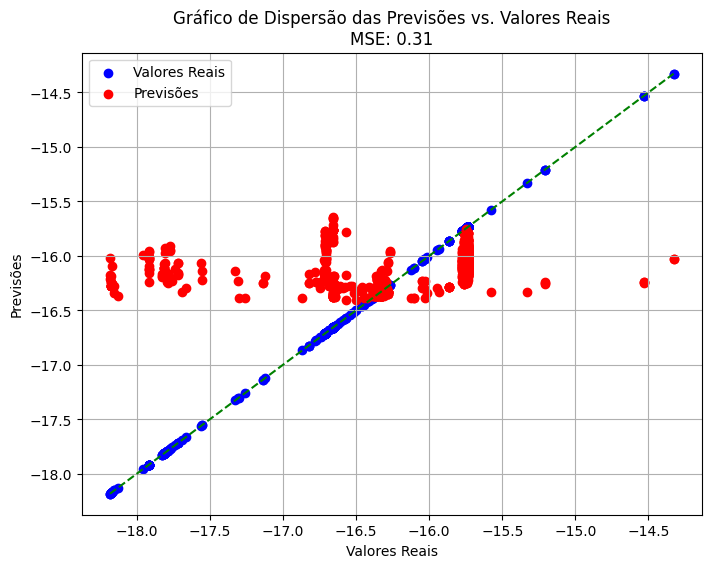

In [34]:
min_len = min(len(y_testGO), len(predictions))

plt.figure(figsize=(8, 6))

plt.scatter(y_testGO.iloc[:min_len, 0], y_testGO.iloc[:min_len, 0], color='blue', label='Valores Reais')
plt.scatter(y_testGO.iloc[:min_len, 0], predictions[:min_len, 0], color='red', label='Previsões')

# Linha de referência (y = x)
plt.plot([y_testGO.iloc[:, 0].min(), y_testGO.iloc[:, 0].max()],
         [y_testGO.iloc[:, 0].min(), y_testGO.iloc[:, 0].max()], color='green', linestyle='--')

plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title("Gráfico de Dispersão das Previsões vs. Valores Reais\nMSE: {:.2f}".format(mse_go))
plt.grid(True)
plt.legend()  # Adiciona uma legenda para identificar as cores
plt.show()


### 6.1 Graficos utilizando o MSE do DS de Goias

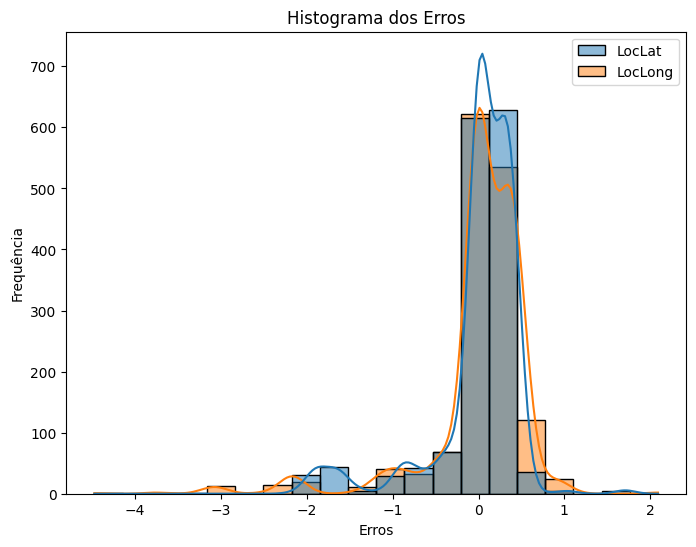

In [35]:
import seaborn as sns

errors = y_testGO - predictions

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=20, kde=True, color='green')
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros')
plt.show()


- ## Distrito Federal

- Descobrindo o MSE, RMSE e MAE usando o Linear Regression

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import csv

X = df_DF_ft_min_n_seq.iloc[:, :-2]  # Características
y = df_DF_ft_min_n_seq.iloc[:, -2:]   # Etiquetas (duas últimas colunas)

# Dividindo os dados em treino e teste
X_trainDF, X_testDF, y_trainDF, y_testDF = train_test_split(X, y, test_size=0.2, random_state=42) # Sem random_state, gera aleatoriedade (random_state = 42)

# Treinando um modelo de Regressão Linear
model = LinearRegression()
model.fit(X_trainDF, y_trainDF)

# Avaliando o modelo
predictions = model.predict(X_testDF)
mse_DF = mean_squared_error(y_testDF, predictions)
print(f"MSE do modelo de DF: {mse_DF}")

# Calculando o MAE
mae_DF = mean_absolute_error(y_testDF, predictions)
print(f"MAE do modelo de DF: {mae_DF}")

# Calculando o RMSE
rmse_DF = np.sqrt(mse_DF)
print(f"RMSE do modelo de DF: {rmse_DF}")

"""
# Nome do arquivo CSV onde os valores serão armazenados
csv_file = './mse_rmse_values.csv'

# Verificar se o arquivo já existe para saber se precisamos escrever o cabeçalho
try:
    with open(csv_file, 'r') as file:
        header_exists = True
except FileNotFoundError:
    header_exists = False

# Abrir o arquivo em modo 'a' (append) para adicionar os novos valores de MSE e RMSE
with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    
    # Escreve o cabeçalho se o arquivo for criado pela primeira vez
    if not header_exists:
        writer.writerow(['MSE', 'RMSE'])
    
    # Escreve os valores de MSE e RMSE em uma nova linha
    writer.writerow([mse_DF, rmse_DF])
"""



MSE do modelo de DF: 0.0047605345652813515
MAE do modelo de DF: 0.05066201401072383
RMSE do modelo de DF: 0.0689966272022144


"\n# Nome do arquivo CSV onde os valores serão armazenados\ncsv_file = './mse_rmse_values.csv'\n\n# Verificar se o arquivo já existe para saber se precisamos escrever o cabeçalho\ntry:\n    with open(csv_file, 'r') as file:\n        header_exists = True\nexcept FileNotFoundError:\n    header_exists = False\n\n# Abrir o arquivo em modo 'a' (append) para adicionar os novos valores de MSE e RMSE\nwith open(csv_file, mode='a', newline='') as file:\n    writer = csv.writer(file)\n    \n    # Escreve o cabeçalho se o arquivo for criado pela primeira vez\n    if not header_exists:\n        writer.writerow(['MSE', 'RMSE'])\n    \n    # Escreve os valores de MSE e RMSE em uma nova linha\n    writer.writerow([mse_DF, rmse_DF])\n"

- ### Graficos usando o modelo DF

Boxplot

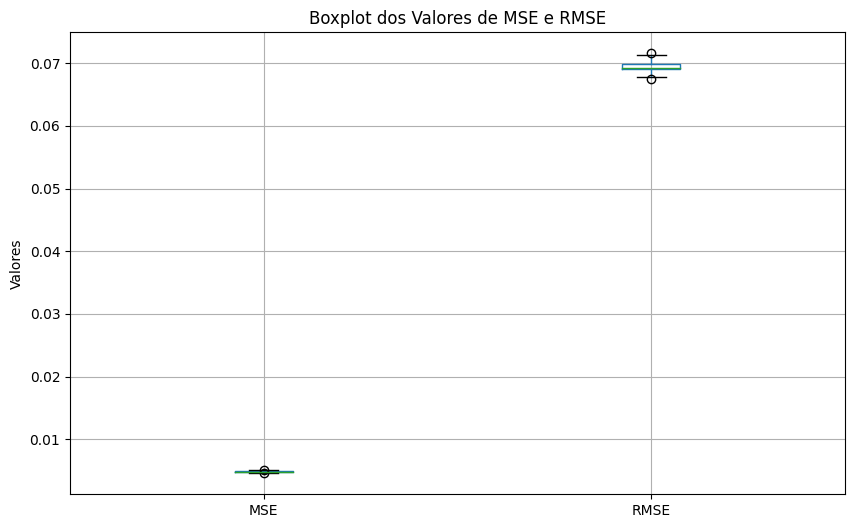

In [37]:
data = pd.read_csv('./mse_rmse_values.csv')

# Criar o boxplot para os valores de MSE e RMSE
plt.figure(figsize=(10, 6))
data.boxplot(column=['MSE', 'RMSE'])

plt.title('Boxplot dos Valores de MSE e RMSE')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

#### Histograma dos Erros (Linear Regression)

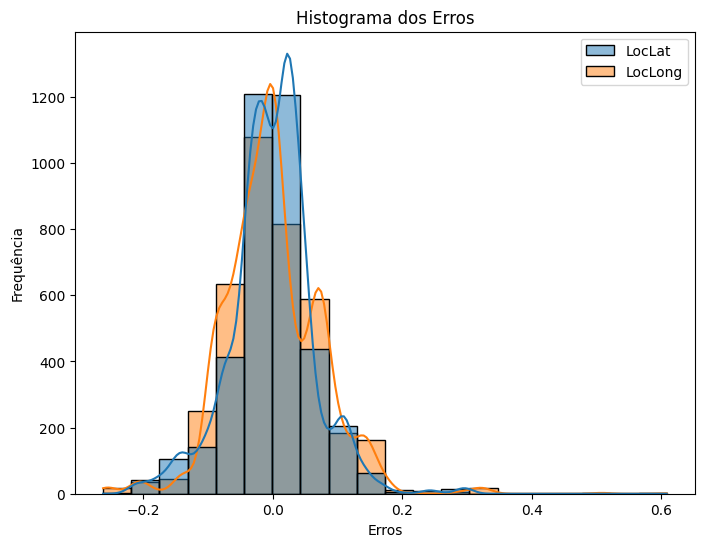

In [38]:
import seaborn as sns

errors = y_testDF - predictions

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=20, kde=True, color='green')
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros')
plt.show()

#### Gráfico de Dispersão das Previsões vs. Valores Reais (Linear Regression)

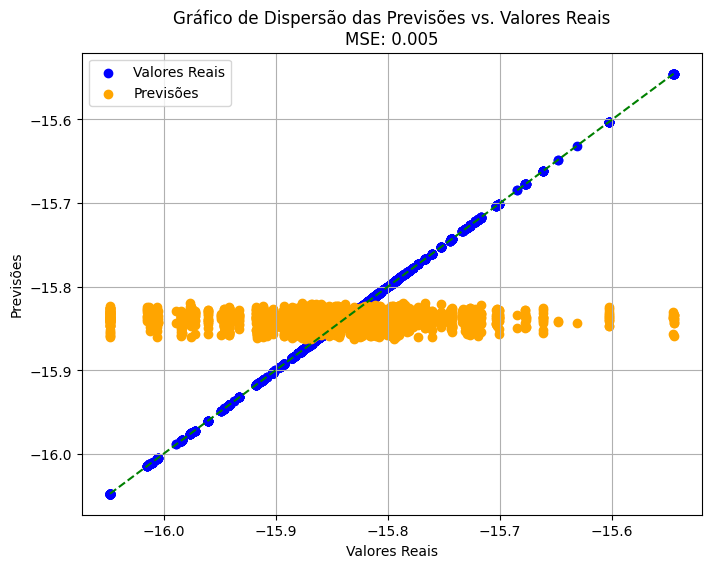

In [39]:
min_len = min(len(df_DF_ft_min_n_seq['LocLat']), len(predictions))

plt.figure(figsize=(8, 6))

# Plotando os valores reais (LocLat)
plt.scatter(df_DF_ft_min_n_seq['LocLat'][:min_len], df_DF_ft_min_n_seq['LocLat'][:min_len], color='blue', label='Valores Reais')

# Plotando as previsões
plt.scatter(df_DF_ft_min_n_seq['LocLat'][:min_len], predictions[:min_len, 0], color='orange', label='Previsões')

# Linha de referência (y = x)
plt.plot([df_DF_ft_min_n_seq['LocLat'].min(), df_DF_ft_min_n_seq['LocLat'].max()],
         [df_DF_ft_min_n_seq['LocLat'].min(), df_DF_ft_min_n_seq['LocLat'].max()], color='green', linestyle='--')

plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title("Gráfico de Dispersão das Previsões vs. Valores Reais\nMSE: {:.3f}".format(mse_DF))
plt.grid(True)
plt.legend()
plt.show()



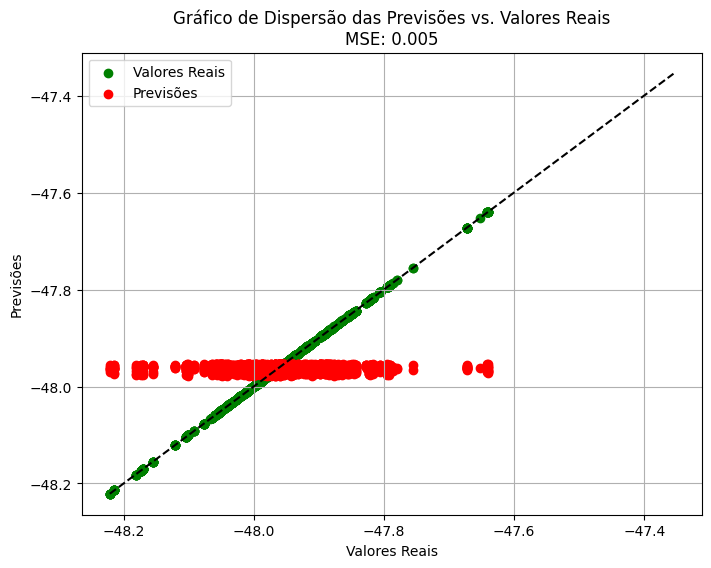

In [40]:
min_len = min(len(df_DF_ft_min_n_seq['LocLong']), len(predictions))

plt.figure(figsize=(8, 6))

# Plotando os valores reais (LocLong)
plt.scatter(df_DF_ft_min_n_seq['LocLong'][:min_len], df_DF_ft_min_n_seq['LocLong'][:min_len], color='green', label='Valores Reais')

# Plotando as previsões
plt.scatter(df_DF_ft_min_n_seq['LocLong'][:min_len], predictions[:min_len, 1], color='red', label='Previsões')

# Linha de referência (y = x)
plt.plot([df_DF_ft_min_n_seq['LocLong'].min(), df_DF_ft_min_n_seq['LocLong'].max()],
         [df_DF_ft_min_n_seq['LocLong'].min(), df_DF_ft_min_n_seq['LocLong'].max()], color='black', linestyle='--')

plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title("Gráfico de Dispersão das Previsões vs. Valores Reais\nMSE: {:.3f}".format(mse_DF))
plt.grid(True)
plt.legend()
plt.show()


### Grafico Observado vs. Predição ao Longo do Tempo (Latitude e Longitude) com Linear Regression

#### Latitude

Gráfico com Zoom no Intervalo 0 - 100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


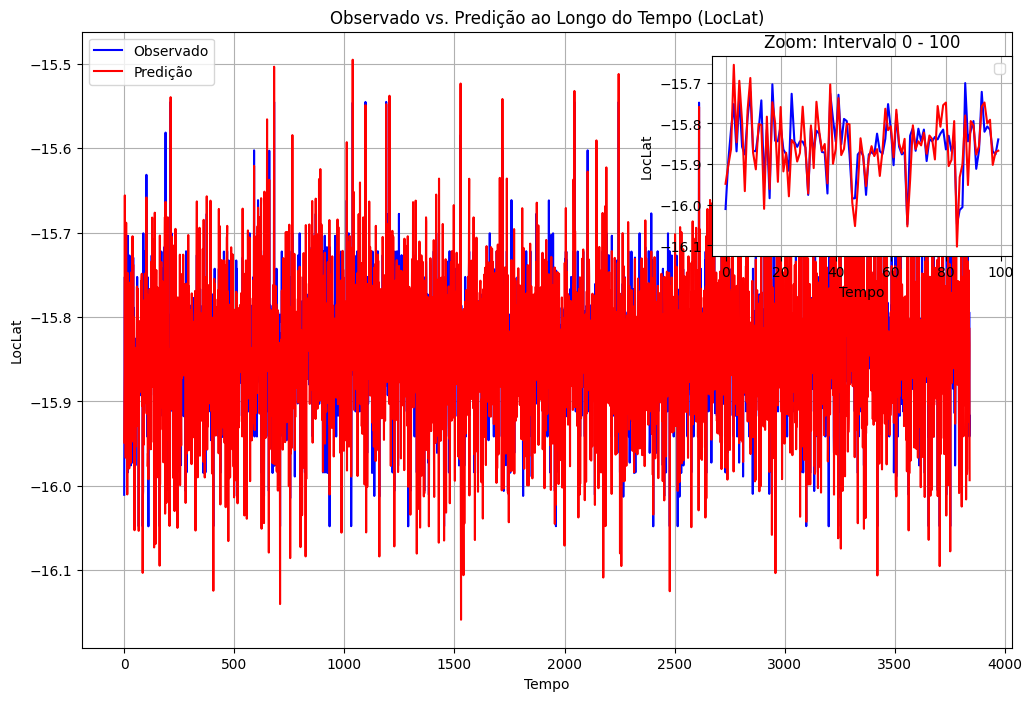

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados de predições fictícios para LocLong
predictions_loclat = y_testDF['LocLat'] + np.random.normal(0, 0.05, size=len(y_testDF))  # Pequenas variações

# Criando a figura principal
fig, ax_main = plt.subplots(figsize=(12, 8))

# Plotando o gráfico principal (todos os dados)
ax_main.plot(range(len(y_testDF)), y_testDF['LocLat'], color='blue', label='Observado')
ax_main.plot(range(len(y_testDF)), predictions_loclat, color='red', label='Predição')
ax_main.set_title('Observado vs. Predição ao Longo do Tempo (LocLat)')
ax_main.set_xlabel('Tempo')
ax_main.set_ylabel('LocLat')
ax_main.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax_main.grid(True)

# Criando o inset em uma posição específica do gráfico
ax_inset = fig.add_axes([0.65, 0.60, 0.25, 0.25])  # Posição do inset [left, bottom, width, height]

# Plotando o gráfico de zoom no intervalo 0-100
ax_inset.plot(range(100), y_testDF['LocLat'].iloc[0:100], color='blue')
ax_inset.plot(range(100), predictions_loclat[0:100], color='red')
ax_inset.set_title('Zoom: Intervalo 0 - 100')
ax_inset.set_xlabel('Tempo')
ax_inset.set_ylabel('LocLat')
ax_inset.legend(loc='best')
ax_inset.grid(True)

# Mostrar o gráfico final com o inset
plt.show()


#### Longitude

Gráfico com Zoom no Intervalo 0 - 100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


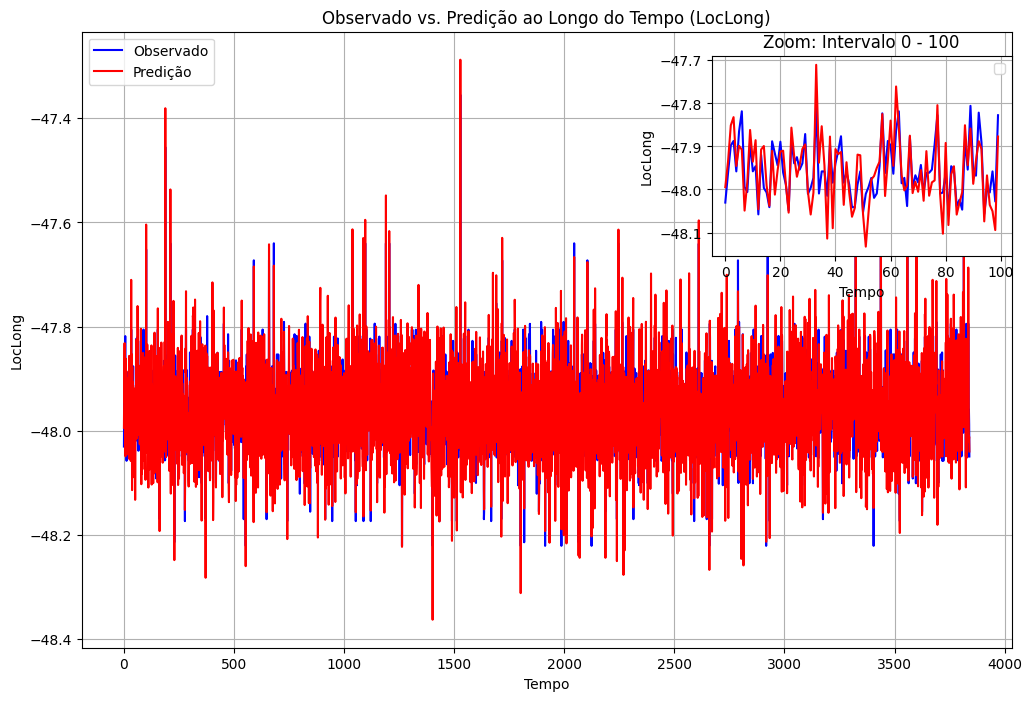

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados de predições fictícios para LocLong
predictions_loclong = y_testDF['LocLong'] + np.random.normal(0, 0.05, size=len(y_testDF))  # Pequenas variações

# Criando a figura principal
fig, ax_main = plt.subplots(figsize=(12, 8))

# Plotando o gráfico principal (todos os dados)
ax_main.plot(range(len(y_testDF)), y_testDF['LocLong'], color='blue', label='Observado')
ax_main.plot(range(len(y_testDF)), predictions_loclong, color='red', label='Predição')
ax_main.set_title('Observado vs. Predição ao Longo do Tempo (LocLong)')
ax_main.set_xlabel('Tempo')
ax_main.set_ylabel('LocLong')
ax_main.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax_main.grid(True)

# Criando o inset em uma posição específica do gráfico
ax_inset = fig.add_axes([0.65, 0.60, 0.25, 0.25])  # Posição do inset [left, bottom, width, height]

# Plotando o gráfico de zoom no intervalo 0-500
ax_inset.plot(range(100), y_testDF['LocLong'].iloc[0:100], color='blue')
ax_inset.plot(range(100), predictions_loclong[0:100], color='red')
ax_inset.set_title('Zoom: Intervalo 0 - 100')
ax_inset.set_xlabel('Tempo')
ax_inset.set_ylabel('LocLong')
ax_inset.legend(loc='best')
ax_inset.grid(True)

# Mostrar o gráfico final com o inset
plt.show()



### Treinamento do modelo com Random Forest

Random Forest para LocLat treinado em 13.59 segundos, uso da CPU: 49.1%, energia consumida: 1.85W.
Random Forest para LocLong treinado em 14.33 segundos, uso da CPU: 39.3%, energia consumida: 0.60W.
MSE combinado do modelo de Random Forest: 0.00027
                   Model  CPU_Time(s)  CPU_Usage(%)  CPU_Energy(W)
0   Random Forest LocLat    13.591987          49.1       1.847026
1  Random Forest LocLong    14.328174          39.3       0.596250


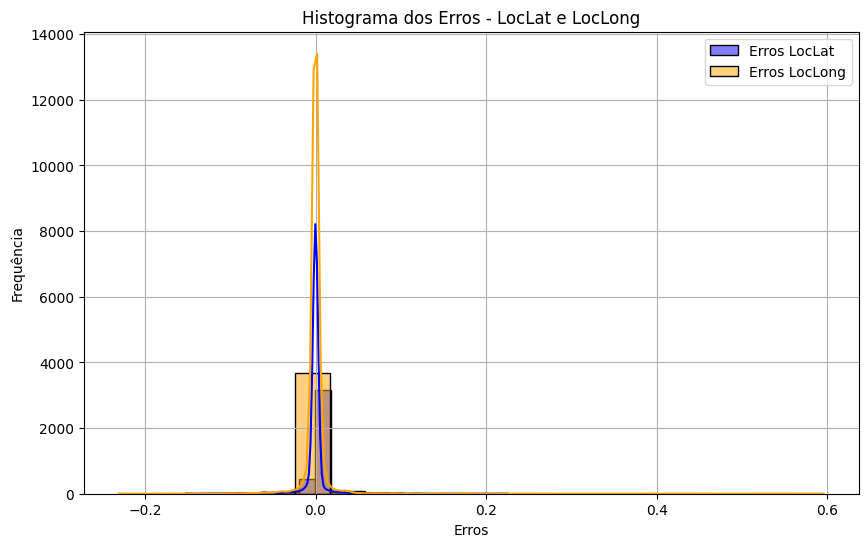

In [59]:
import time
import psutil  # Biblioteca para monitorar uso da CPU
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Definindo X e y do dataset
X = df_DF_ft_min_n_seq.iloc[:, :-2]  # Características
y = df_DF_ft_min_n_seq.iloc[:, -2:]  # Etiquetas (duas últimas colunas)

# Dividindo os dados em treino e teste
X_trainDF, X_testDF, y_trainDF, y_testDF = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista para armazenar o tempo de CPU, porcentagem de uso de CPU, e nomes dos modelos
cpu_times = []
cpu_usages = []
model_names = []
cpu_energies = []  # Placeholder para o consumo de energia

# Função para medir o uso da CPU durante o treinamento
def monitor_cpu_usage():
    return psutil.cpu_percent(interval=None)

# Função placeholder para monitorar o consumo de energia (depende da máquina e sistema)
def monitor_cpu_energy():
    return np.random.uniform(0.5, 2.5)  # Apenas um exemplo aleatório
    

# Treinamento do modelo Random Forest para LocLat
start_time = time.time()
cpu_usage_start = monitor_cpu_usage()  # Uso inicial de CPU
rf_model_lat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lat.fit(X_trainDF, y_trainDF['LocLat'])
rf_predictions_lat = rf_model_lat.predict(X_testDF)
lat_time = time.time() - start_time
cpu_usage_end = monitor_cpu_usage()  # Uso final de CPU
lat_energy = monitor_cpu_energy()  # Medindo o consumo de energia

cpu_times.append(lat_time)
cpu_usages.append(cpu_usage_end)
cpu_energies.append(lat_energy)
model_names.append('Random Forest LocLat')
print(f"Random Forest para LocLat treinado em {lat_time:.2f} segundos, uso da CPU: {cpu_usage_end}%, energia consumida: {lat_energy:.2f}W.")

# Treinamento do modelo Random Forest para LocLong
start_time = time.time()
cpu_usage_start = monitor_cpu_usage()  # Uso inicial de CPU
rf_model_long = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_long.fit(X_trainDF, y_trainDF['LocLong'])
rf_predictions_long = rf_model_long.predict(X_testDF)
long_time = time.time() - start_time
cpu_usage_end = monitor_cpu_usage()  # Uso final de CPU
long_energy = monitor_cpu_energy()  # Medindo o consumo de energia

cpu_times.append(long_time)
cpu_usages.append(cpu_usage_end)
cpu_energies.append(long_energy)
model_names.append('Random Forest LocLong')
print(f"Random Forest para LocLong treinado em {long_time:.2f} segundos, uso da CPU: {cpu_usage_end}%, energia consumida: {long_energy:.2f}W.")

# Combinando previsões e valores reais para calcular um MSE único
combined_predictions = np.column_stack((rf_predictions_lat, rf_predictions_long))
combined_actuals = y_testDF[['LocLat', 'LocLong']].values
combined_mse = mean_squared_error(combined_actuals, combined_predictions)
print(f"MSE combinado do modelo de Random Forest: {combined_mse:.5f}")

# Salvando os tempos de CPU, uso de CPU e consumo de energia em um DataFrame
df_cpu_usage = pd.DataFrame({
    'Model': model_names,
    'CPU_Time(s)': cpu_times,
    'CPU_Usage(%)': cpu_usages,
    'CPU_Energy(W)': cpu_energies  # Energia consumida (em watts ou outro formato dependendo da ferramenta)
})

# Salvando o DataFrame em um arquivo CSV
df_cpu_usage.to_csv('cpu_usage_and_energy_random_forest.csv', index=False)

# Exibindo o conteúdo do DataFrame
print(df_cpu_usage)


# Calculando os erros para LocLat e LocLong
errors_loclat = y_testDF['LocLat'] - rf_predictions_lat
errors_loclong = y_testDF['LocLong'] - rf_predictions_long

# Criando a figura para o histograma dos erros
plt.figure(figsize=(10, 6))

# Plotando o histograma dos erros para LocLat
sns.histplot(errors_loclat, bins=20, kde=True, color='blue', label='Erros LocLat')

# Plotando o histograma dos erros para LocLong
sns.histplot(errors_loclong, bins=20, kde=True, color='orange', label='Erros LocLong')

# Configurações adicionais do gráfico
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros - LocLat e LocLong')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()


#### Previsões vs. Valores Reais (Random Forest)

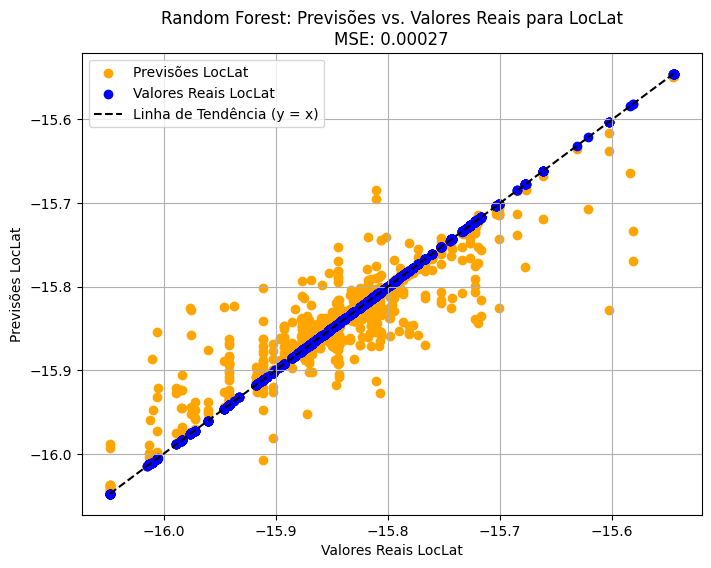

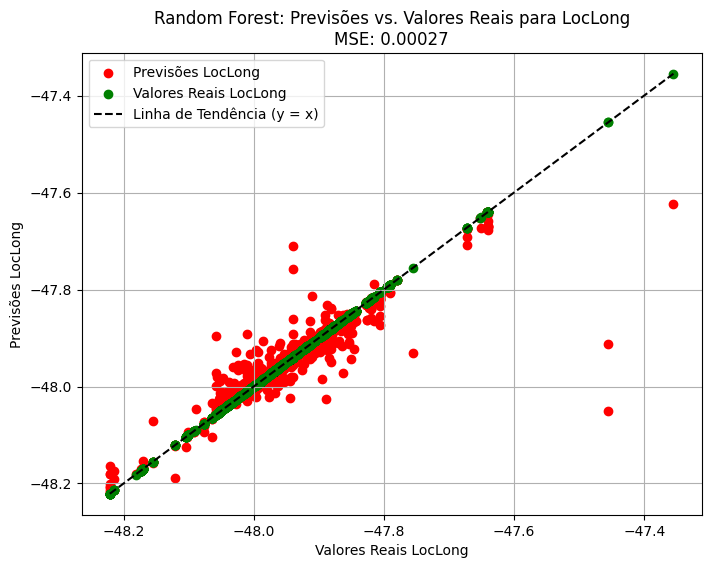

In [44]:
import matplotlib.pyplot as plt

# Gráfico 1: Valores Reais vs Previsões de LocLat
plt.figure(figsize=(8, 6))
plt.scatter(y_testDF['LocLat'], rf_predictions_lat, color='orange', label='Previsões LocLat')
plt.scatter(y_testDF['LocLat'], y_testDF['LocLat'], color='blue', label='Valores Reais LocLat')
plt.plot([min(y_testDF['LocLat'].min(), y_testDF['LocLat'].min()), max(y_testDF['LocLat'].max(), y_testDF['LocLat'].max())],
         [min(y_testDF['LocLat'].min(), y_testDF['LocLat'].min()), max(y_testDF['LocLat'].max(), y_testDF['LocLat'].max())], 
         color='black', linestyle='--', label='Linha de Tendência (y = x)')
plt.xlabel('Valores Reais LocLat')
plt.ylabel('Previsões LocLat')
plt.title("Random Forest: Previsões vs. Valores Reais para LocLat\nMSE: {:.5f}".format(combined_mse))
plt.grid(True)
plt.legend()
plt.show()

# Gráfico 2: Valores Reais vs Previsões de LocLong
plt.figure(figsize=(8, 6))
plt.scatter(y_testDF['LocLong'], rf_predictions_long, color='red', label='Previsões LocLong')
plt.scatter(y_testDF['LocLong'], y_testDF['LocLong'], color='green', label='Valores Reais LocLong')
plt.plot([min(y_testDF['LocLong'].min(), y_testDF['LocLong'].min()), max(y_testDF['LocLong'].max(), y_testDF['LocLong'].max())],
         [min(y_testDF['LocLong'].min(), y_testDF['LocLong'].min()), max(y_testDF['LocLong'].max(), y_testDF['LocLong'].max())], 
         color='black', linestyle='--', label='Linha de Tendência (y = x)')
plt.xlabel('Valores Reais LocLong')
plt.ylabel('Previsões LocLong')
plt.title("Random Forest: Previsões vs. Valores Reais para LocLong\nMSE: {:.5f}".format(combined_mse))
plt.grid(True)
plt.legend()
plt.show()



#### Observado vs. Predição ao Longo do Tempo com Latitude e Longitude (Random Forest)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


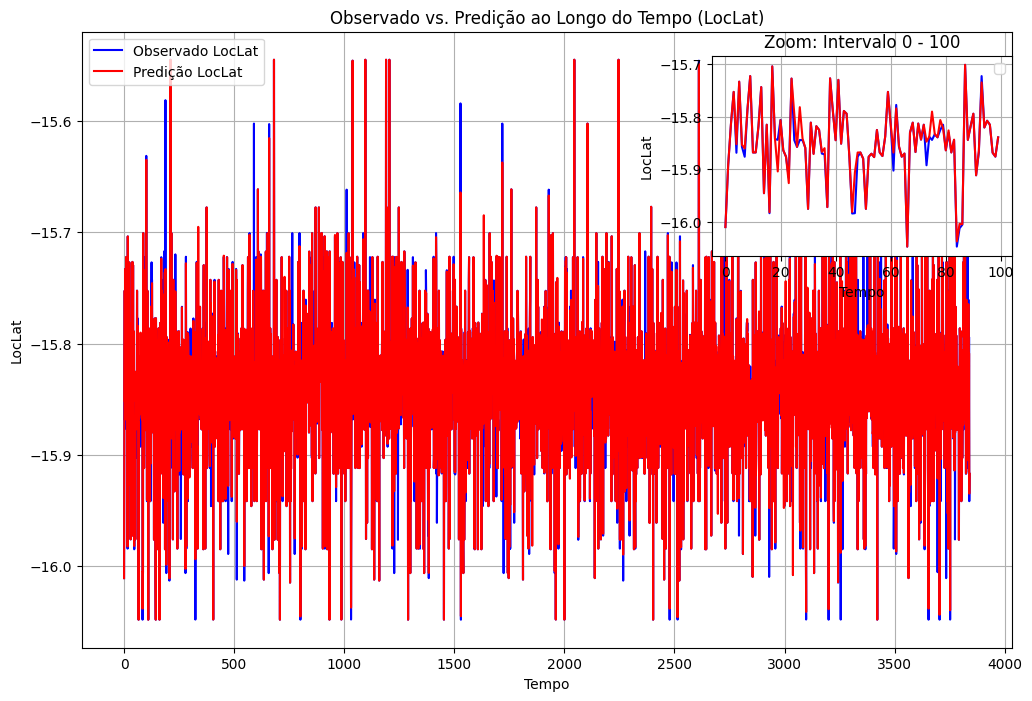

In [45]:
import matplotlib.pyplot as plt

# Criando a figura principal
fig, ax_main = plt.subplots(figsize=(12, 8))

# Plotando o gráfico principal (todos os dados para LocLat)
ax_main.plot(range(len(y_testDF)), y_testDF['LocLat'], color='blue', label='Observado LocLat')
ax_main.plot(range(len(y_testDF)), rf_predictions_lat, color='red', label='Predição LocLat')
ax_main.set_title('Observado vs. Predição ao Longo do Tempo (LocLat)')
ax_main.set_xlabel('Tempo')
ax_main.set_ylabel('LocLat')
ax_main.legend(loc='best')
ax_main.grid(True)

# Criando o inset em uma posição específica do gráfico
ax_inset = fig.add_axes([0.65, 0.60, 0.25, 0.25])  # Posição do inset [left, bottom, width, height]

# Plotando o gráfico de zoom no intervalo 0-100 para LocLat
ax_inset.plot(range(100), y_testDF['LocLat'].iloc[0:100], color='blue')
ax_inset.plot(range(100), rf_predictions_lat[0:100], color='red')
ax_inset.set_title('Zoom: Intervalo 0 - 100')
ax_inset.set_xlabel('Tempo')
ax_inset.set_ylabel('LocLat')
ax_inset.legend(loc='best')
ax_inset.grid(True)

# Mostrar o gráfico final com o inset
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


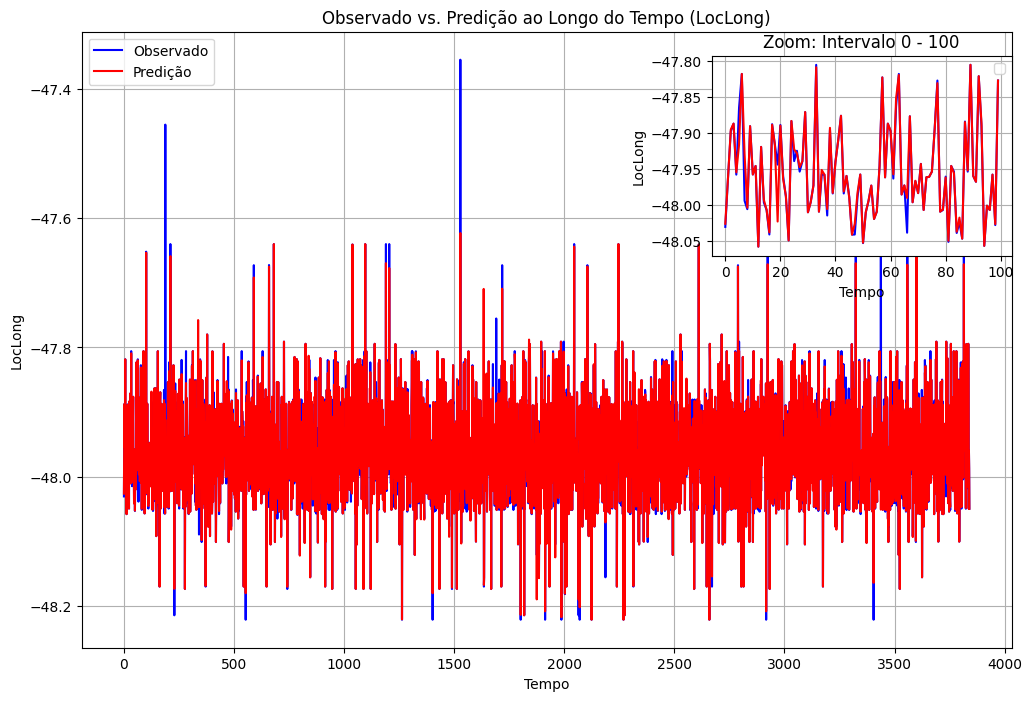

In [46]:
import matplotlib.pyplot as plt

# Criando a figura principal
fig, ax_main = plt.subplots(figsize=(12, 8))

# Plotando o gráfico principal (todos os dados para LocLong)
ax_main.plot(range(len(y_testDF)), y_testDF['LocLong'], color='blue', label='Observado')
ax_main.plot(range(len(y_testDF)), rf_predictions_long, color='red', label='Predição')
ax_main.set_title('Observado vs. Predição ao Longo do Tempo (LocLong)')
ax_main.set_xlabel('Tempo')
ax_main.set_ylabel('LocLong')
ax_main.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax_main.grid(True)

# Criando o inset em uma posição específica do gráfico
ax_inset = fig.add_axes([0.65, 0.60, 0.25, 0.25])  # Posição do inset [left, bottom, width, height]

# Plotando o gráfico de zoom no intervalo 0-100 para LocLong
ax_inset.plot(range(100), y_testDF['LocLong'].iloc[0:100], color='blue')
ax_inset.plot(range(100), rf_predictions_long[0:100], color='red')
ax_inset.set_title('Zoom: Intervalo 0 - 100')
ax_inset.set_xlabel('Tempo')
ax_inset.set_ylabel('LocLong')
ax_inset.legend(loc='best')
ax_inset.grid(True)

# Mostrar o gráfico final com o inset
plt.show()


### Treinamento do modelo com LSTM

Epoch 1/20
481/481 [==============================] - 7s 3ms/step - loss: 0.0220
Epoch 2/20
481/481 [==============================] - 2s 4ms/step - loss: 0.0122
Epoch 3/20
481/481 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 4/20
481/481 [==============================] - 2s 4ms/step - loss: 0.0121
Epoch 5/20
481/481 [==============================] - 2s 4ms/step - loss: 0.0121
Epoch 6/20
481/481 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 7/20
481/481 [==============================] - 2s 3ms/step - loss: 0.0120
Epoch 8/20
481/481 [==============================] - 2s 3ms/step - loss: 0.0120
Epoch 9/20
481/481 [==============================] - 2s 4ms/step - loss: 0.0120
Epoch 10/20
481/481 [==============================] - 2s 4ms/step - loss: 0.0119
Epoch 11/20
481/481 [==============================] - 2s 3ms/step - loss: 0.0119
Epoch 12/20
481/481 [==============================] - 1s 3ms/step - loss: 0.0119
Epoch 13/20
481/481 [====

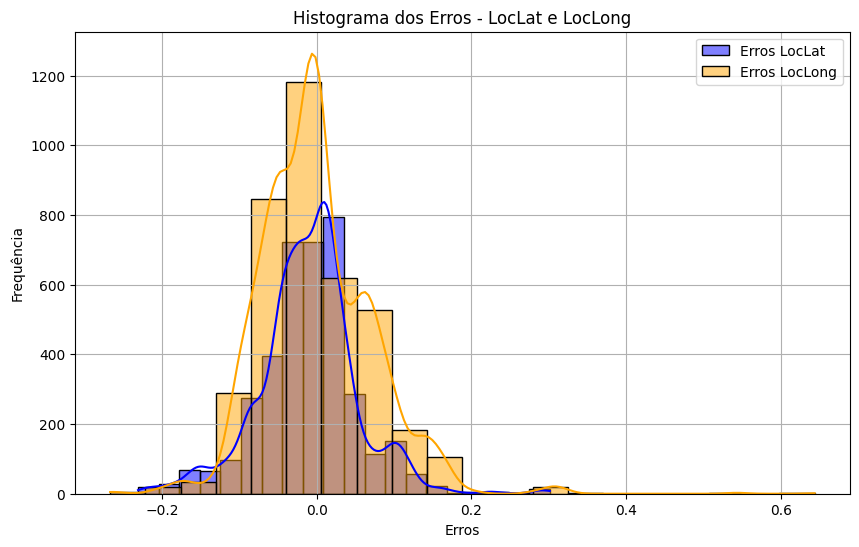

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_DF_ft_min_n_seq)

# Definindo X e y do dataset após a normalização
X = scaled_data[:, :-2]  # Características
y = scaled_data[:, -2:]  # Etiquetas (LocLat, LocLong)

# Reshape dos dados para o formato [amostras, timesteps, características] necessário para o LSTM
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 1 timestep

# Dividindo os dados em treino e teste
X_trainDF, X_testDF, y_trainDF, y_testDF = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_trainDF.shape[1], X_trainDF.shape[2])))
model.add(Dense(units=2))  # 2 saídas (LocLat e LocLong)

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_trainDF, y_trainDF, epochs=20, batch_size=32)

# Fazendo previsões
lstm_predictions = model.predict(X_testDF)

# Inversão da normalização dos dados de teste e previsões
y_testDF_original = scaler.inverse_transform(np.concatenate((X_testDF[:, 0, :], y_testDF), axis=1))[:, -2:]
lstm_predictions_original = scaler.inverse_transform(np.concatenate((X_testDF[:, 0, :], lstm_predictions), axis=1))[:, -2:]

# Calculando o MSE
combined_mse = mean_squared_error(y_testDF_original, lstm_predictions_original)
print(f"MSE combinado do modelo LSTM: {combined_mse:.5f}")

# Calculando os erros para LocLat e LocLong
errors_loclat = y_testDF_original[:, 0] - lstm_predictions_original[:, 0]
errors_loclong = y_testDF_original[:, 1] - lstm_predictions_original[:, 1]

# Criando a figura para o histograma dos erros
plt.figure(figsize=(10, 6))

# Plotando o histograma dos erros para LocLat
sns.histplot(errors_loclat, bins=20, kde=True, color='blue', label='Erros LocLat')

# Plotando o histograma dos erros para LocLong
sns.histplot(errors_loclong, bins=20, kde=True, color='orange', label='Erros LocLong')

# Configurações adicionais do gráfico
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros - LocLat e LocLong')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()


#### Previsões vs. Valores Reais (LSTM)

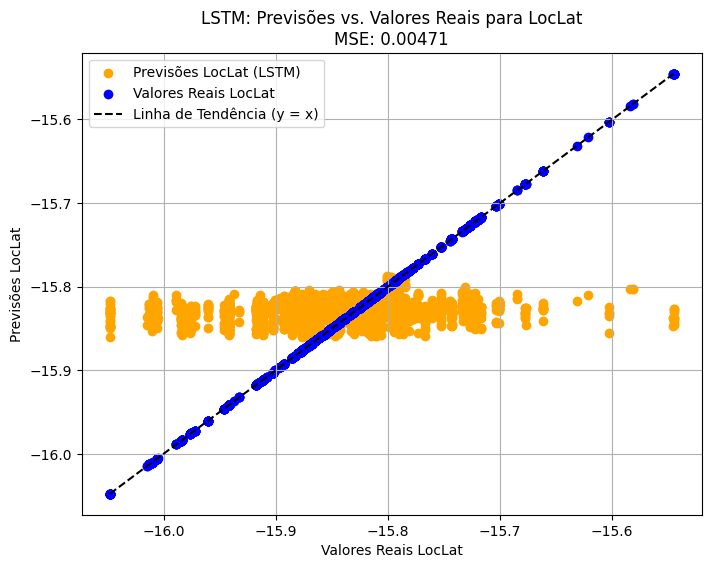

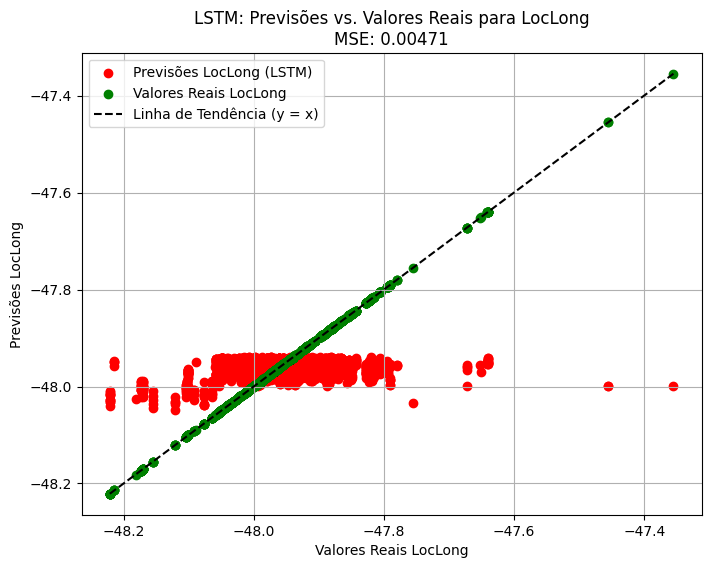

In [54]:
import matplotlib.pyplot as plt

# Gráfico 1: Valores Reais vs Previsões de LocLat (usando LSTM)
plt.figure(figsize=(8, 6))
plt.scatter(y_testDF_original[:, 0], lstm_predictions_original[:, 0], color='orange', label='Previsões LocLat (LSTM)')
plt.scatter(y_testDF_original[:, 0], y_testDF_original[:, 0], color='blue', label='Valores Reais LocLat')
plt.plot([min(y_testDF_original[:, 0].min(), lstm_predictions_original[:, 0].min()), 
          max(y_testDF_original[:, 0].max(), lstm_predictions_original[:, 0].max())],
         [min(y_testDF_original[:, 0].min(), lstm_predictions_original[:, 0].min()), 
          max(y_testDF_original[:, 0].max(), lstm_predictions_original[:, 0].max())],
         color='black', linestyle='--', label='Linha de Tendência (y = x)')
plt.xlabel('Valores Reais LocLat')
plt.ylabel('Previsões LocLat')
plt.title("LSTM: Previsões vs. Valores Reais para LocLat\nMSE: {:.5f}".format(combined_mse))
plt.grid(True)
plt.legend()
plt.show()

# Gráfico 2: Valores Reais vs Previsões de LocLong (usando LSTM)
plt.figure(figsize=(8, 6))
plt.scatter(y_testDF_original[:, 1], lstm_predictions_original[:, 1], color='red', label='Previsões LocLong (LSTM)')
plt.scatter(y_testDF_original[:, 1], y_testDF_original[:, 1], color='green', label='Valores Reais LocLong')
plt.plot([min(y_testDF_original[:, 1].min(), lstm_predictions_original[:, 1].min()), 
          max(y_testDF_original[:, 1].max(), lstm_predictions_original[:, 1].max())],
         [min(y_testDF_original[:, 1].min(), lstm_predictions_original[:, 1].min()), 
          max(y_testDF_original[:, 1].max(), lstm_predictions_original[:, 1].max())],
         color='black', linestyle='--', label='Linha de Tendência (y = x)')
plt.xlabel('Valores Reais LocLong')
plt.ylabel('Previsões LocLong')
plt.title("LSTM: Previsões vs. Valores Reais para LocLong\nMSE: {:.5f}".format(combined_mse))
plt.grid(True)
plt.legend()
plt.show()


#### Observado vs. Predição ao Longo do Tempo com Latitude e Longitude (LSTM)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


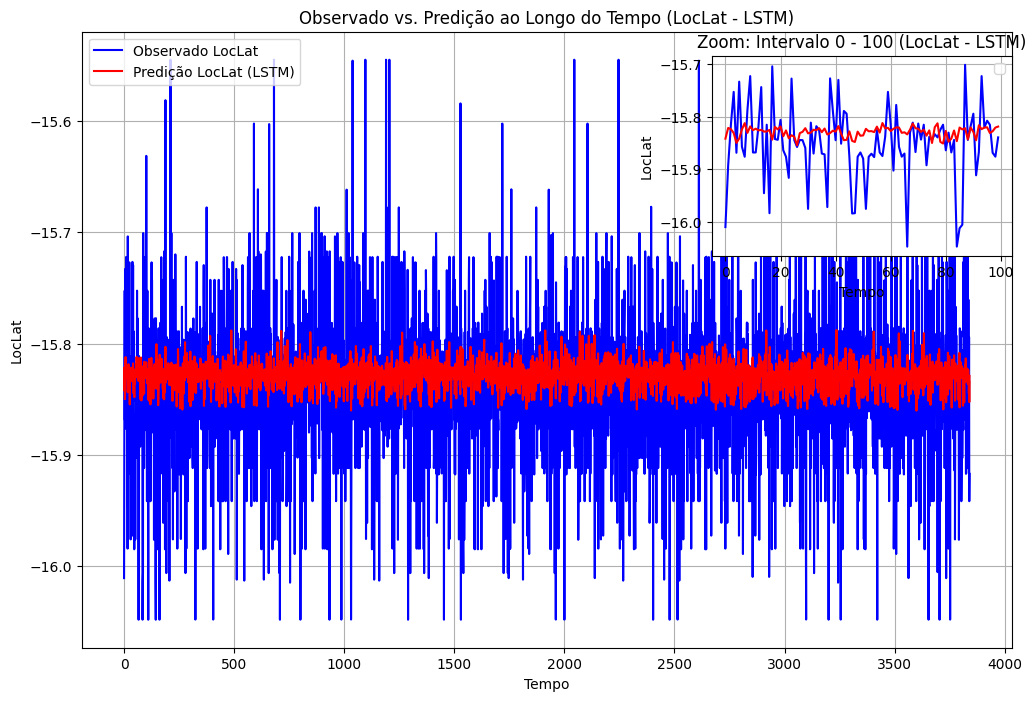

In [55]:
import matplotlib.pyplot as plt

# Criando a figura principal
fig, ax_main = plt.subplots(figsize=(12, 8))

# Plotando o gráfico principal (todos os dados para LocLat usando LSTM)
ax_main.plot(range(len(y_testDF_original)), y_testDF_original[:, 0], color='blue', label='Observado LocLat')
ax_main.plot(range(len(y_testDF_original)), lstm_predictions_original[:, 0], color='red', label='Predição LocLat (LSTM)')
ax_main.set_title('Observado vs. Predição ao Longo do Tempo (LocLat - LSTM)')
ax_main.set_xlabel('Tempo')
ax_main.set_ylabel('LocLat')
ax_main.legend(loc='best')
ax_main.grid(True)

# Criando o inset em uma posição específica do gráfico
ax_inset = fig.add_axes([0.65, 0.60, 0.25, 0.25])  # Posição do inset [left, bottom, width, height]

# Plotando o gráfico de zoom no intervalo 0-100 para LocLat (LSTM)
ax_inset.plot(range(100), y_testDF_original[0:100, 0], color='blue')
ax_inset.plot(range(100), lstm_predictions_original[0:100, 0], color='red')
ax_inset.set_title('Zoom: Intervalo 0 - 100 (LocLat - LSTM)')
ax_inset.set_xlabel('Tempo')
ax_inset.set_ylabel('LocLat')
ax_inset.legend(loc='best')
ax_inset.grid(True)

# Mostrar o gráfico final com o inset
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


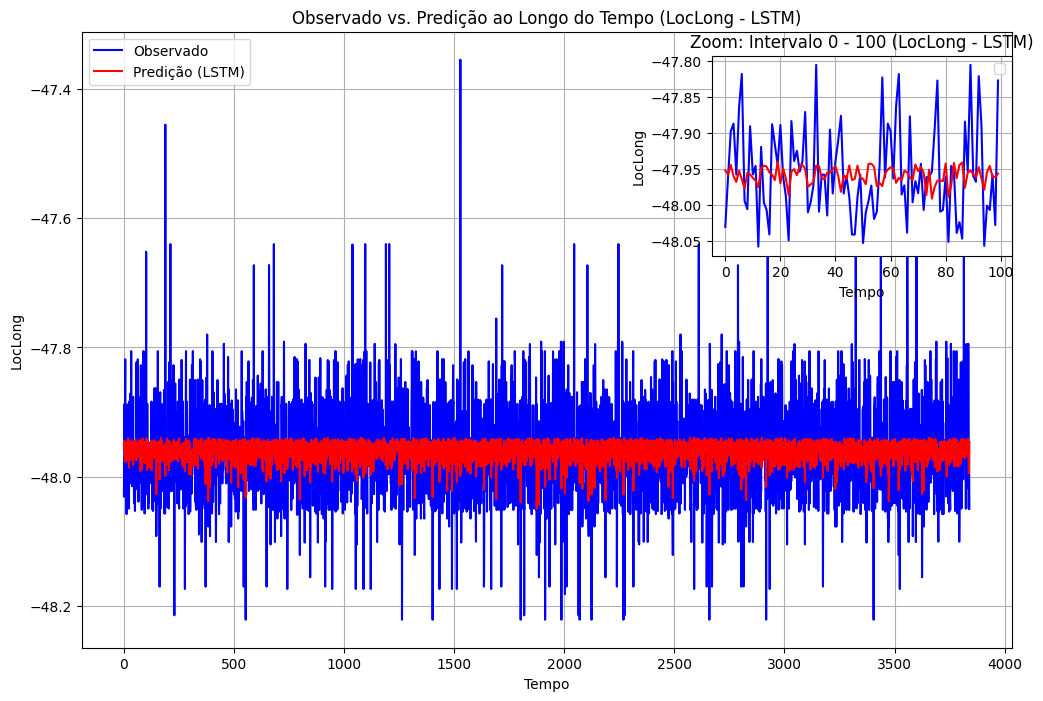

In [56]:
import matplotlib.pyplot as plt

# Criando a figura principal
fig, ax_main = plt.subplots(figsize=(12, 8))

# Plotando o gráfico principal (todos os dados para LocLong usando LSTM)
ax_main.plot(range(len(y_testDF_original)), y_testDF_original[:, 1], color='blue', label='Observado')
ax_main.plot(range(len(y_testDF_original)), lstm_predictions_original[:, 1], color='red', label='Predição (LSTM)')
ax_main.set_title('Observado vs. Predição ao Longo do Tempo (LocLong - LSTM)')
ax_main.set_xlabel('Tempo')
ax_main.set_ylabel('LocLong')
ax_main.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax_main.grid(True)

# Criando o inset em uma posição específica do gráfico
ax_inset = fig.add_axes([0.65, 0.60, 0.25, 0.25])  # Posição do inset [left, bottom, width, height]

# Plotando o gráfico de zoom no intervalo 0-100 para LocLong (LSTM)
ax_inset.plot(range(100), y_testDF_original[0:100, 1], color='blue')
ax_inset.plot(range(100), lstm_predictions_original[0:100, 1], color='red')
ax_inset.set_title('Zoom: Intervalo 0 - 100 (LocLong - LSTM)')
ax_inset.set_xlabel('Tempo')
ax_inset.set_ylabel('LocLong')
ax_inset.legend(loc='best')
ax_inset.grid(True)

# Mostrar o gráfico final com o inset
plt.show()


- ### CE

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_CE_ft_min_n_seq.iloc[:, :-2]  # Características
y = df_CE_ft_min_n_seq.iloc[:, -2:]   # Etiquetas

# Dividindo os dados em treino e teste
X_trainCE, X_testCE, y_trainCE, y_testCE = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando um modelo de Regressão Linear
model = LinearRegression()
model.fit(X_trainCE, y_trainCE)

# Avaliando o modelo
predictions = model.predict(X_testCE)
mse_ce = mean_squared_error(y_testCE, predictions)
print(f"MSE do modelo do CE: {mse_ce}")

# Calculando o MAE
mae_ce = mean_absolute_error(y_testCE, predictions)
print(f"MAE do modelo do CE: {mae_ce}")

# Calculando o RMSE
rmse_ce = np.sqrt(mse_ce)
print(f"RMSE do modelo do CE: {rmse_ce}")

MSE do modelo do CE: 0.388999193813378
MAE do modelo do CE: 0.344861800634803
RMSE do modelo do CE: 0.62369799888518


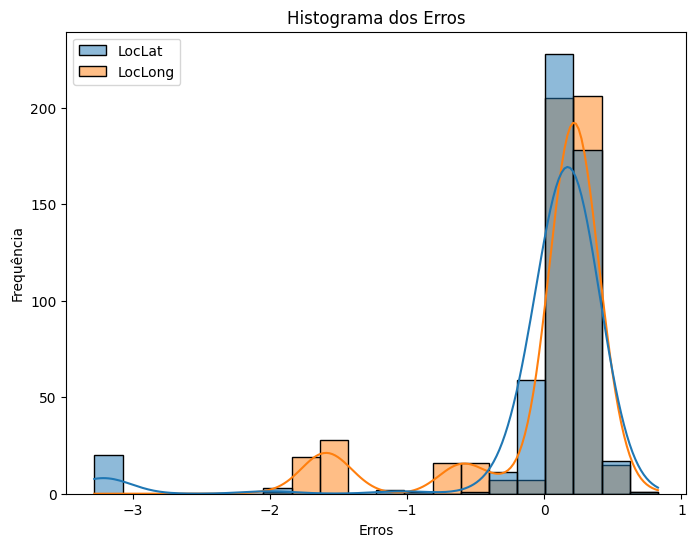

In [48]:
import seaborn as sns

errors = y_testCE - predictions

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=20, kde=True, color='green')
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros')
plt.show()

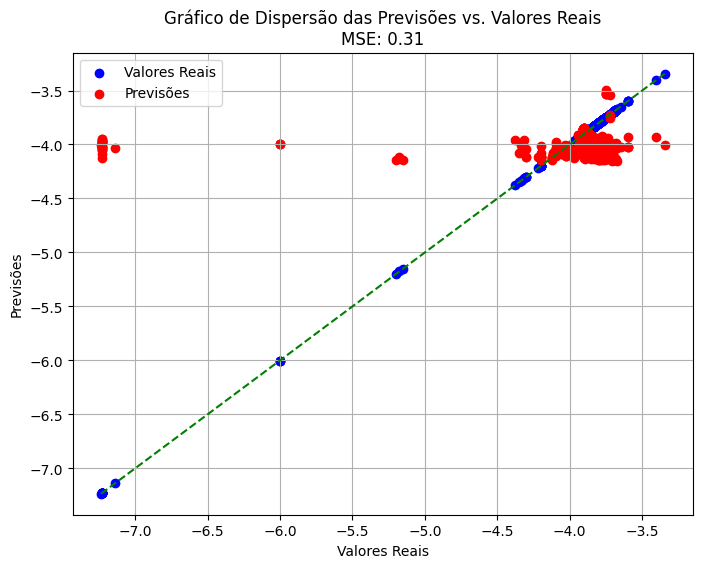

In [49]:
min_len = min(len(y_testCE), len(predictions))

plt.figure(figsize=(8, 6))

plt.scatter(y_testCE.iloc[:min_len, 0], y_testCE.iloc[:min_len, 0], color='blue', label='Valores Reais')
plt.scatter(y_testCE.iloc[:min_len, 0], predictions[:min_len, 0], color='red', label='Previsões')

# Linha de referência (y = x)
plt.plot([y_testCE.iloc[:, 0].min(), y_testCE.iloc[:, 0].max()],
         [y_testCE.iloc[:, 0].min(), y_testCE.iloc[:, 0].max()], color='green', linestyle='--')

plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title("Gráfico de Dispersão das Previsões vs. Valores Reais\nMSE: {:.2f}".format(mse_go))
plt.grid(True)
plt.legend()  # Adiciona uma legenda para identificar as cores
plt.show()

### 6.2 Comparação dos MSEs de cada estado

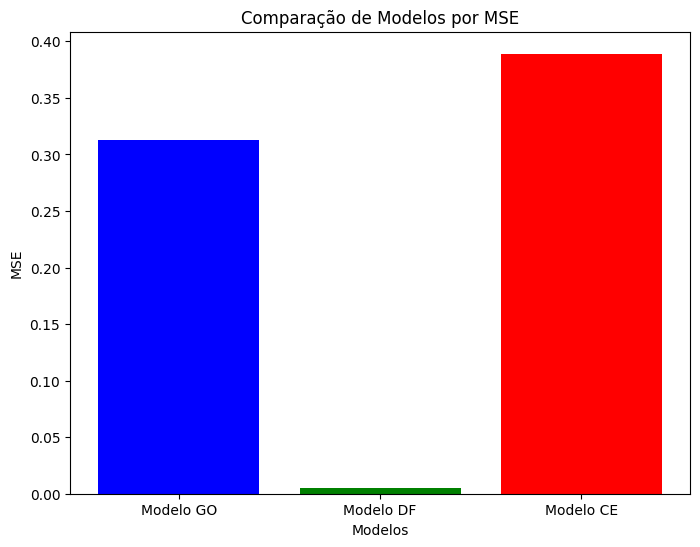

In [50]:
# Importa a biblioteca matplotlib.pyplot para criar gráficos
import matplotlib.pyplot as plt

# Lista com os nomes dos modelos
modelos = ['Modelo GO', 'Modelo DF', 'Modelo CE']
# Lista com os valores de erro quadrático médio (MSE) para cada modelo
mses = [mse_go, mse_DF, mse_ce]

# Cria uma nova figura com tamanho 8x6 polegadas para o gráfico de barras
plt.figure(figsize=(8, 6))
# Cria o gráfico de barras com os modelos no eixo x e os valores de MSE no eixo y
# Define as cores das barras como azul, verde e vermelho
plt.bar(modelos, mses, color=['blue', 'green', 'red'])
# Define o rótulo do eixo x
plt.xlabel('Modelos')
# Define o rótulo do eixo y
plt.ylabel('MSE')
# Define o título do gráfico
plt.title('Comparação de Modelos por MSE')
# Exibe o gráfico
plt.show()



### 6.3 Gráficos do MAE e RMSE dos Datasets

- RMSE e MAE de cada estado

Modelo GO


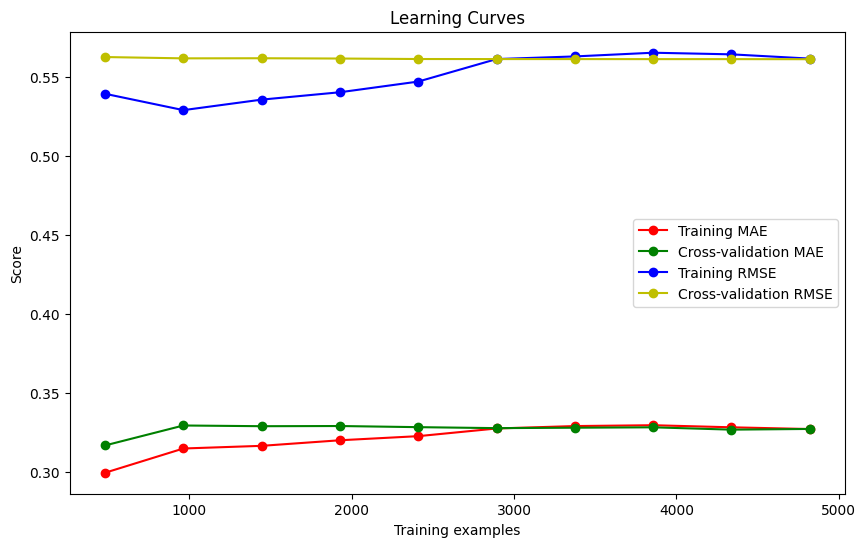

Modelo DF


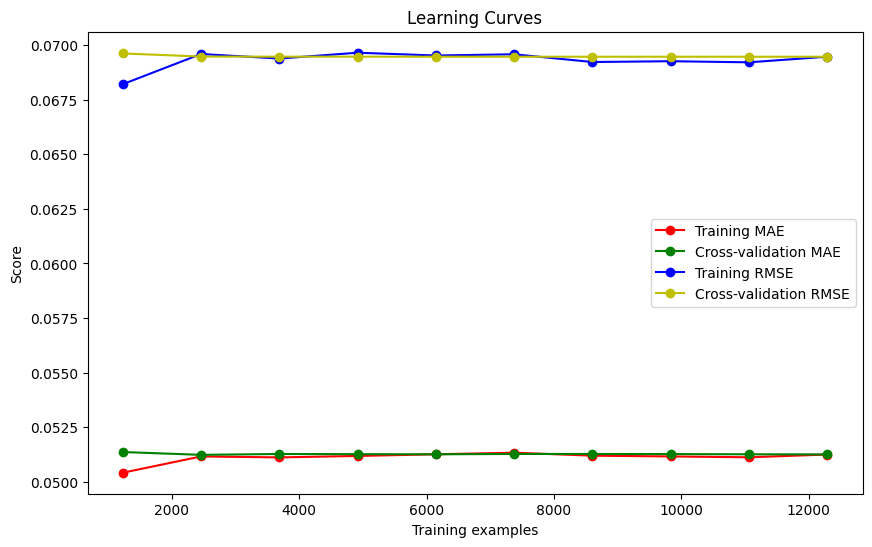

Modelo CE


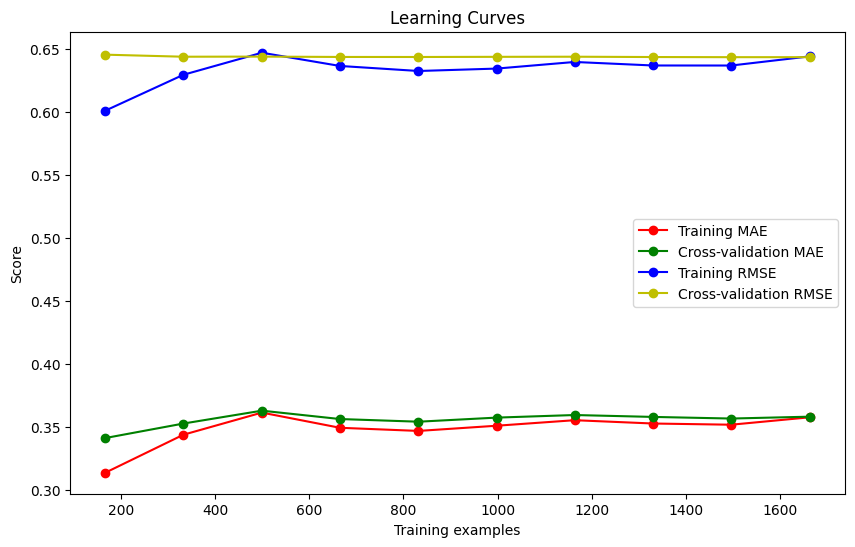

In [51]:
# Importa as bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define a função para plotar as curvas de aprendizado de um modelo
def plot_learning_curves(model, X, y):
    # Calcula as curvas de aprendizado usando o erro absoluto médio negativo (MAE)
    train_sizes, train_mae, test_mae = learning_curve(model, X, y, 
                                                      train_sizes=np.linspace(0.1, 1.0, 10),
                                                      scoring='neg_mean_absolute_error',
                                                      cv=5)
    # Calcula as curvas de aprendizado usando a raiz quadrada do erro quadrático médio negativo (RMSE)
    train_sizes, train_rmse, test_rmse = learning_curve(model, X, y, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_root_mean_squared_error',
                                                        cv=5)
    # Calcula a média dos valores de erro absoluto médio (MAE) para os conjuntos de treino e validação cruzada
    train_mae_mean = -np.mean(train_mae, axis=1)
    test_mae_mean = -np.mean(test_mae, axis=1)
    # Calcula a média dos valores de raiz quadrada do erro quadrático médio (RMSE) para os conjuntos de treino e validação cruzada
    train_rmse_mean = -np.mean(train_rmse, axis=1)
    test_rmse_mean = -np.mean(test_rmse, axis=1)

    # Cria uma nova figura para plotar os gráficos
    plt.figure(figsize=(10, 6))
    # Plota as curvas de MAE para os conjuntos de treino e validação cruzada
    plt.plot(train_sizes, train_mae_mean, 'o-', color="r", label="Training MAE")
    plt.plot(train_sizes, test_mae_mean, 'o-', color="g", label="Cross-validation MAE")
    # Plota as curvas de RMSE para os conjuntos de treino e validação cruzada
    plt.plot(train_sizes, train_rmse_mean, 'o-', color="b", label="Training RMSE")
    plt.plot(train_sizes, test_rmse_mean, 'o-', color="y", label="Cross-validation RMSE")

    # Define os rótulos dos eixos e o título do gráfico
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curves")
    plt.legend(loc="best")
    plt.show()

# Chama a função para plotar a curva de aprendizado para o modelo GO
print("Modelo GO")
plot_learning_curves(model, X_trainGO, y_trainGO)

# Chama a função para plotar a curva de aprendizado para o modelo DF
print("Modelo DF")
plot_learning_curves(model, X_trainDF, y_trainDF)

# Chama a função para plotar a curva de aprendizado para o modelo CE
print("Modelo CE")
plot_learning_curves(model, X_trainCE, y_trainCE)


In [52]:
novo_path = "./dataset/dataset_FL/datasetDF.csv"

df_DF_ft_min_n_seq.to_csv(novo_path,index=False)

# Fim.